# DESI

In [1]:
# import all revelant packages
from headers import *

## Setting up the cosmology

In [2]:
# Using halofit to estimate the nonlinear matter power spectrum
desiParams = {
          'output': 'mPk',
          'P_k_max_h/Mpc': 40.,
          'non linear':'halofit', 
          'z_pk': '0.0,10',
          'A_s': 2.10732e-9,
          'n_s': 0.96824,
          'alpha_s': 0.,
          'h': 0.6770,
          'N_ur': 1.0196,
          'N_ncdm': 2,
          'm_ncdm': '0.01,0.05',
          'tau_reio': 0.0568,
          'omega_b': 0.02247,
          'omega_cdm': 0.11923,
          'Omega_k': 0.}

desiCosmo = Class()
desiCosmo.set(desiParams)
desiCosmo.compute()

## Creating the experiment
DESI will observe ELGs, so I set ELG=True. This tells fishlss to use the ELG bias and noise models. For now I'm ignoring photo-z errors, so I set $\sigma_z=0$.

In [3]:
DESI = experiment(zmin=0.6, zmax=1.7, nbins=3, fsky=0.5, sigma_z=0.0, ELG=True)

## Defining the forecast
We will use velocileptors to calculate the nonlinear power spectrum and to model RSD. We choose $k_\text{min}=5\times 10^{-4} {\rm h Mpc^{-1}}$ to be small enough to avoid edge effects in our derivates.

In [4]:
desiCast = fisherForecast(experiment=DESI,cosmo=desiCosmo,params=desiParams,khmin=5.e-4,\
                          khmax=1.,Nk=1000,Nmu=200,velocileptors=True,name='DESI')

Here we choose the parameters to calculate the derivatives for.

In [5]:
desiCast.marg_params = np.array(['h','log(A_s)','omega_cdm','n_s','omega_b','tau_reio','fEDE','b','N',\
                                 'm_ncdm','N_ur','A_lin','alpha_s','Hz','Da','b2',\
                                 'bs','alpha0','alpha2','alpha4','sn2','Omega_k'])

## Calculate the derivatives

In [6]:
desiCast.compute_derivatives()

In [7]:
desiCast.marg_params = np.array(['A_lin'])
omega_lins = np.logspace(np.log10(10),np.log10(250.),20)
for omega_lin in omega_lins:
   desiCast.omega_lin = omega_lin
   desiCast.compute_derivatives()

/home/noah/Documents/Berkeley/fishlss/LPT/cleft_fftw.py:160: RuntimeWarning: overflow encountered in multiply
  bias_integrands = bias_integrands * expon * self.yq**l
/home/noah/Documents/Berkeley/fishlss/LPT/cleft_fftw.py:157: RuntimeWarning: overflow encountered in multiply
  bias_integrands = bias_integrands * expon
/home/noah/Documents/Berkeley/fishlss/LPT/cleft_fftw.py:120: RuntimeWarning: overflow encountered in exp
  expon = np.exp(-0.5*ksq * (self.XYlin - self.sigma))
/home/noah/Documents/Berkeley/fishlss/LPT/cleft_fftw.py:121: RuntimeWarning: overflow encountered in expm1
  exponm1 = np.expm1(-0.5*ksq * (self.XYlin - self.sigma))
/home/noah/Documents/Berkeley/fishlss/LPT/cleft_fftw.py:157: RuntimeWarning: invalid value encountered in multiply
  bias_integrands = bias_integrands * expon
/home/noah/Documents/Berkeley/fishlss/LPT/velocity_moments_fftw.py:188: RuntimeWarning: overflow encountered in multiply
  bias_integrands = bias_integrands * expon * self.yq**l
/home/noah/Docum

In [8]:
desiCast.marg_params = np.array(['fEDE'])
log10z_cs = np.linspace(1.5,6.5,20)
for log10z_c in log10z_cs:
   desiCast.log10z_c = log10z_c
   desiCast.compute_derivatives()

## Check that the derivatives are reasonable

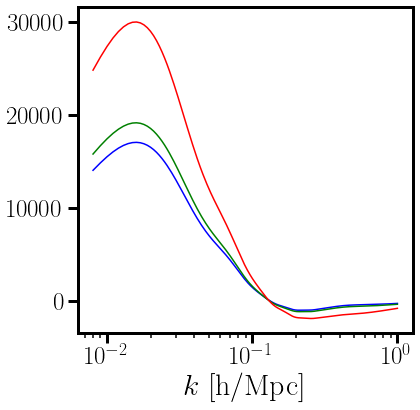

A_lin_1184_78.txt


<Figure size 432x288 with 0 Axes>

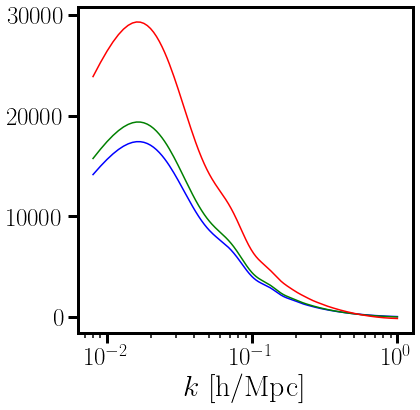

A_lin_1_115.txt


<Figure size 432x288 with 0 Axes>

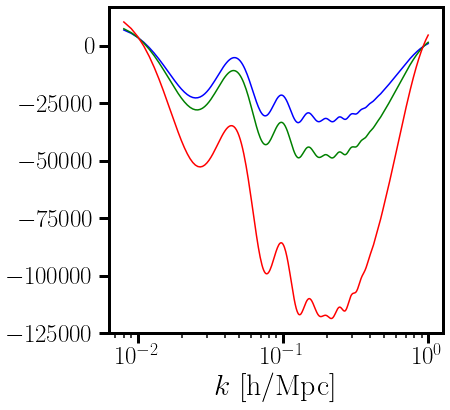

A_lin_12695_115.txt


<Figure size 432x288 with 0 Axes>

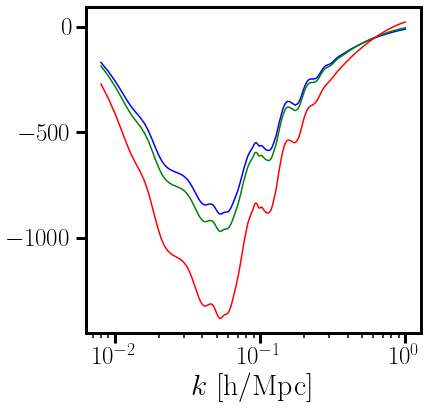

fEDE_5184_151.txt


<Figure size 432x288 with 0 Axes>

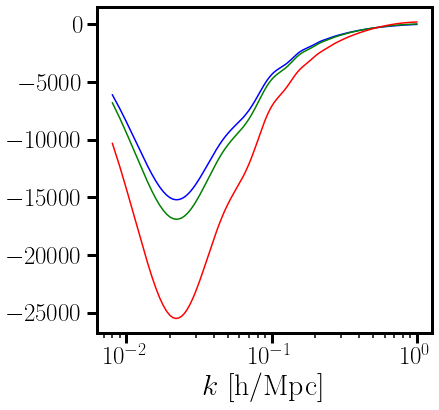

fEDE_2815_115.txt


<Figure size 432x288 with 0 Axes>

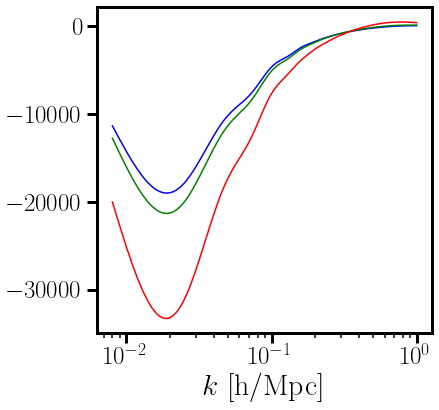

fEDE_2289_78.txt


<Figure size 432x288 with 0 Axes>

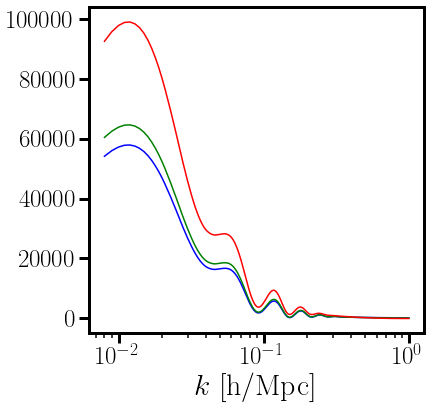

h_115.txt


<Figure size 432x288 with 0 Axes>

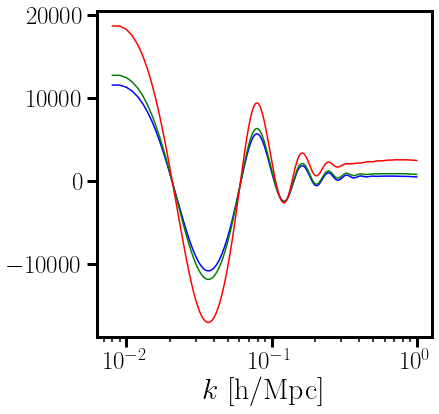

A_lin_7636_151.txt


<Figure size 432x288 with 0 Axes>

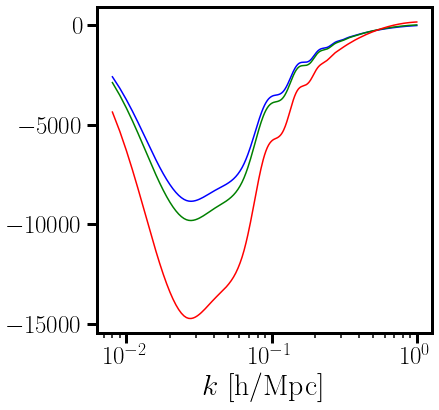

fEDE_3342_115.txt


<Figure size 432x288 with 0 Axes>

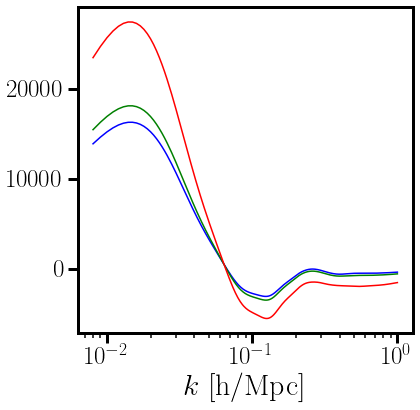

A_lin_2332_115.txt


<Figure size 432x288 with 0 Axes>

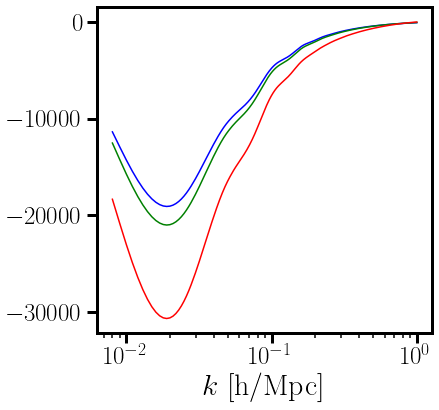

fEDE_2289_151.txt


<Figure size 432x288 with 0 Axes>

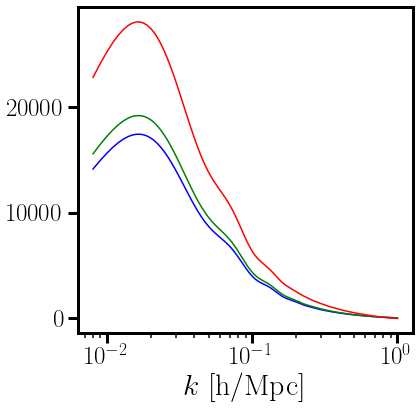

A_lin_1_151.txt


<Figure size 432x288 with 0 Axes>

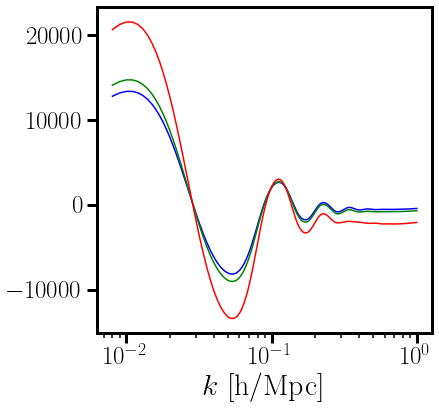

A_lin_5441_151.txt


<Figure size 432x288 with 0 Axes>

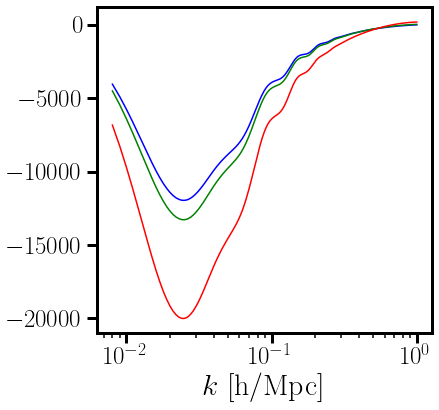

fEDE_3078_115.txt


<Figure size 432x288 with 0 Axes>

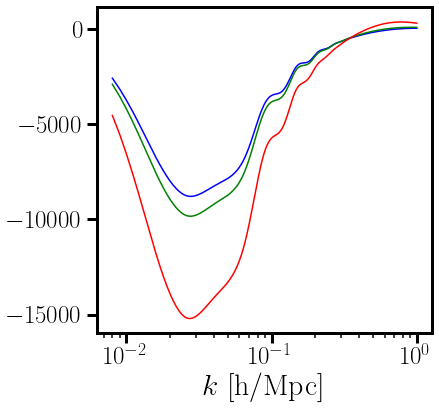

fEDE_3342_78.txt


<Figure size 432x288 with 0 Axes>

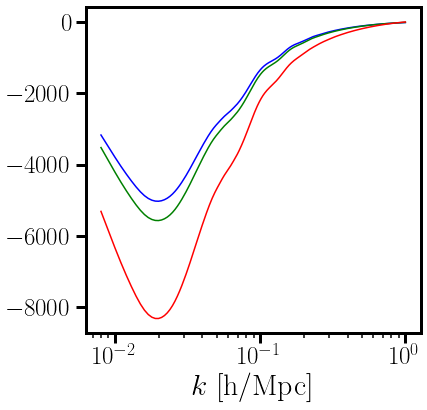

m_ncdm_151.txt


<Figure size 432x288 with 0 Axes>

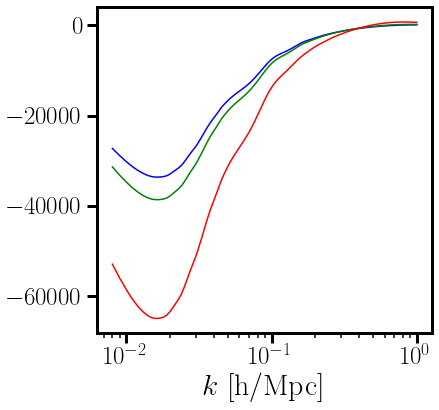

Omega_k_78.txt


<Figure size 432x288 with 0 Axes>

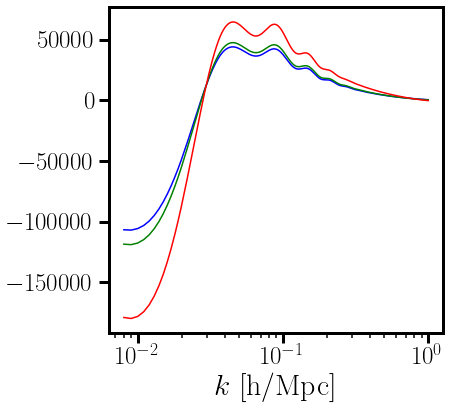

omega_cdm_151.txt


<Figure size 432x288 with 0 Axes>

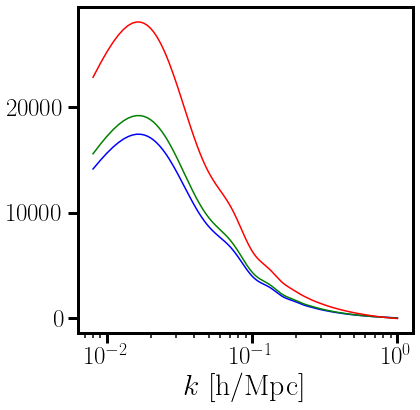

log(A_s)_151.txt


<Figure size 432x288 with 0 Axes>

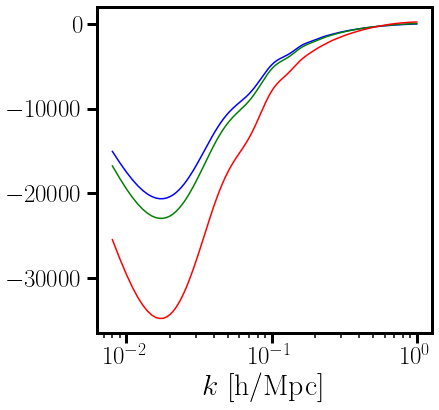

fEDE_1763_115.txt


<Figure size 432x288 with 0 Axes>

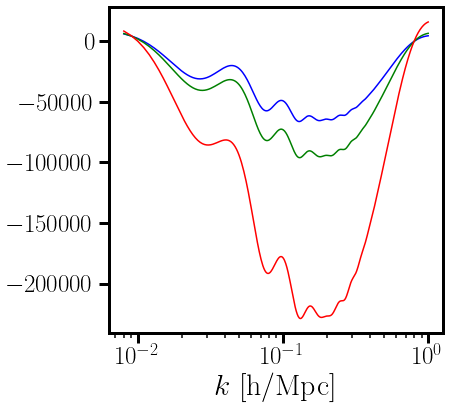

A_lin_12695_78.txt


<Figure size 432x288 with 0 Axes>

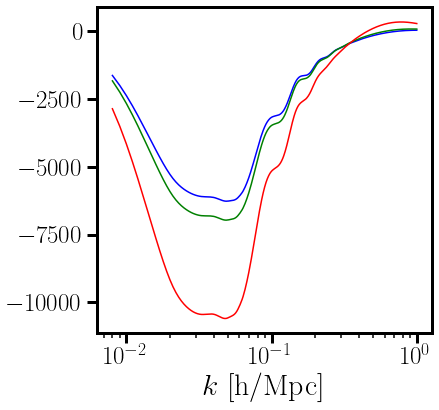

fEDE_3605_78.txt


<Figure size 432x288 with 0 Axes>

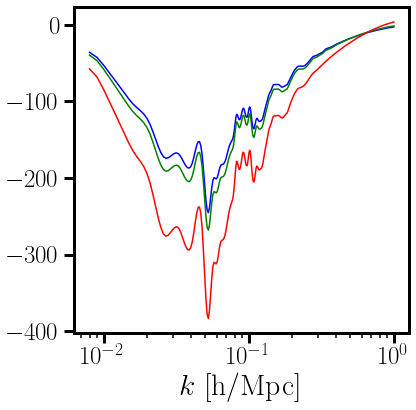

fEDE_6500_151.txt


<Figure size 432x288 with 0 Axes>

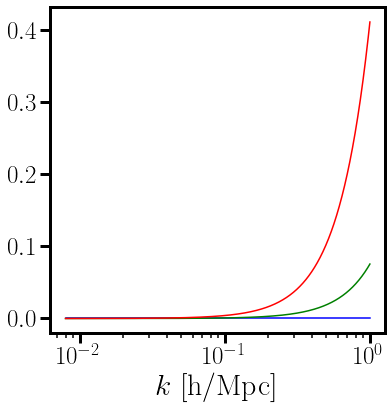

sn2_78.txt


<Figure size 432x288 with 0 Axes>

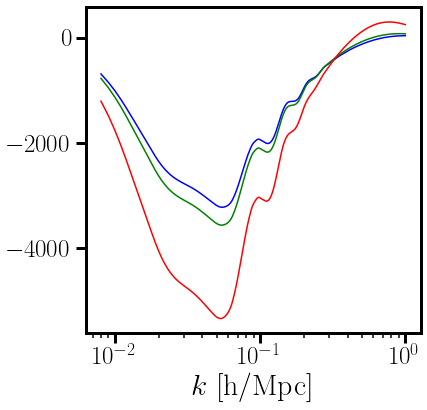

fEDE_4131_78.txt


<Figure size 432x288 with 0 Axes>

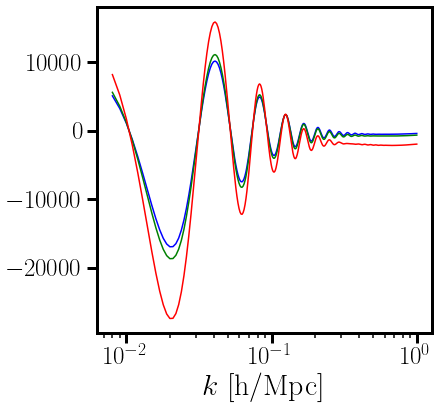

A_lin_15038_151.txt


<Figure size 432x288 with 0 Axes>

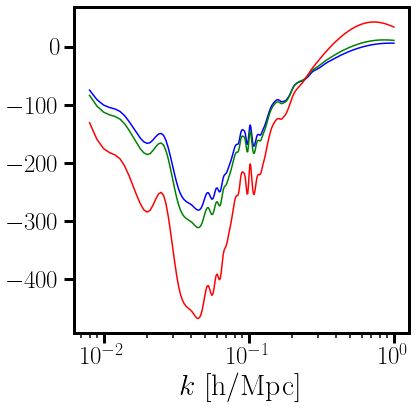

fEDE_6236_78.txt


<Figure size 432x288 with 0 Axes>

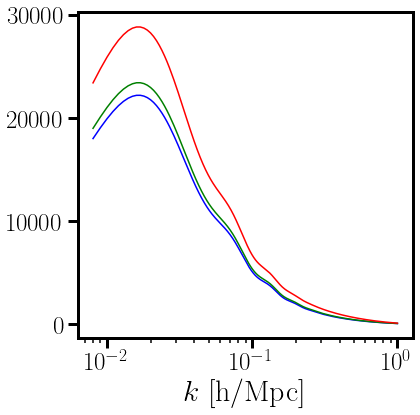

b_115.txt


<Figure size 432x288 with 0 Axes>

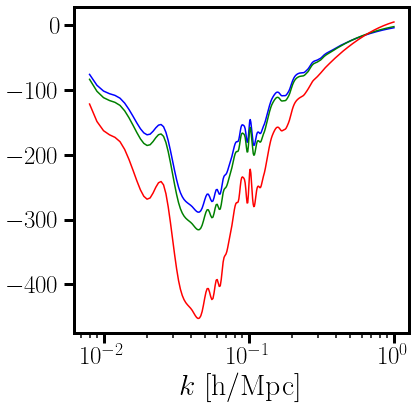

fEDE_6236_151.txt


<Figure size 432x288 with 0 Axes>

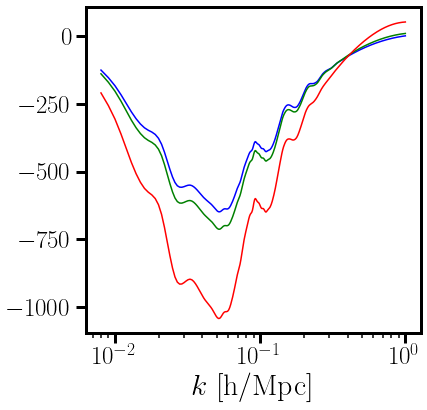

fEDE_5447_115.txt


<Figure size 432x288 with 0 Axes>

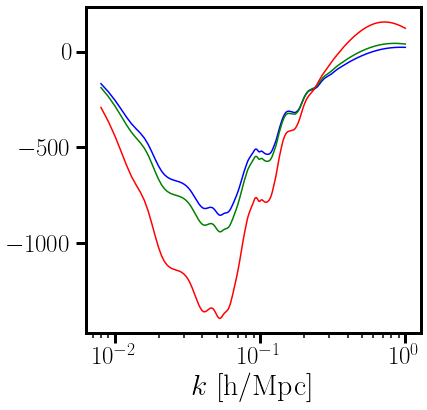

fEDE_5184_78.txt


<Figure size 432x288 with 0 Axes>

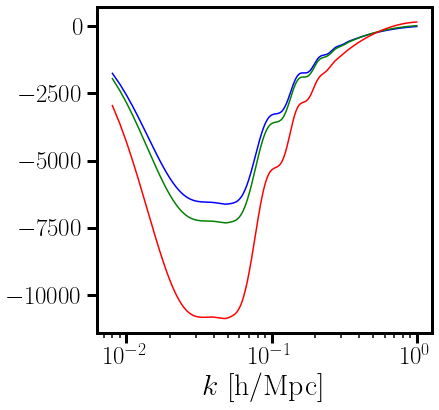

fEDE_3562_115.txt


<Figure size 432x288 with 0 Axes>

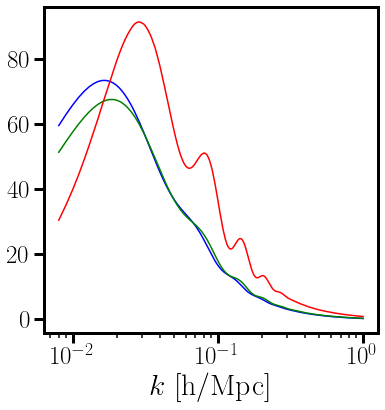

Hz_151.txt


<Figure size 432x288 with 0 Axes>

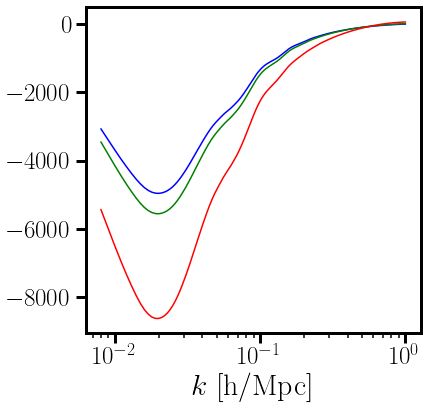

m_ncdm_115.txt


<Figure size 432x288 with 0 Axes>

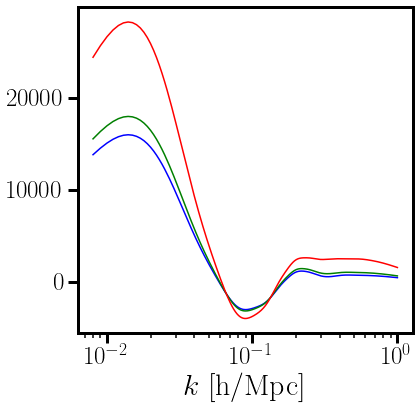

A_lin_2763_78.txt


<Figure size 432x288 with 0 Axes>

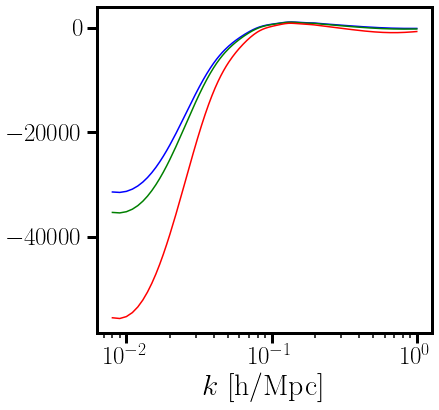

n_s_78.txt


<Figure size 432x288 with 0 Axes>

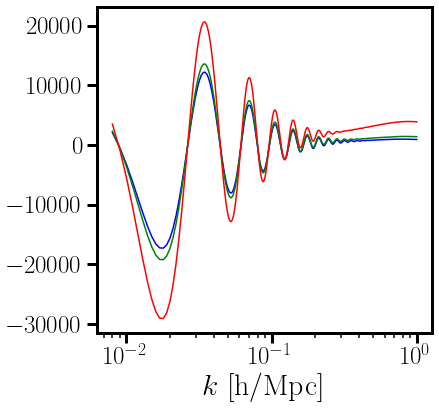

A_lin_17815_115.txt


<Figure size 432x288 with 0 Axes>

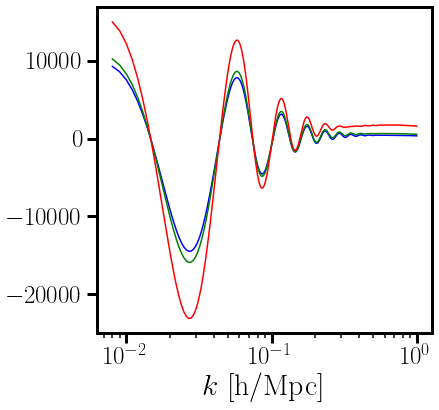

A_lin_10716_151.txt


<Figure size 432x288 with 0 Axes>

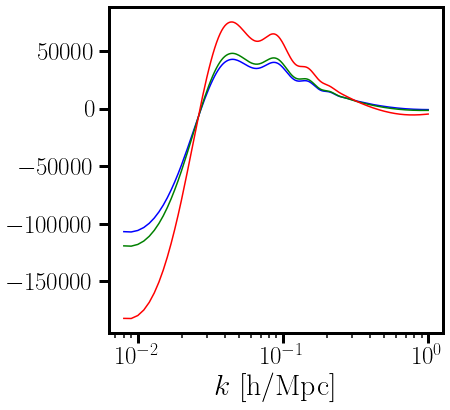

omega_cdm_78.txt


<Figure size 432x288 with 0 Axes>

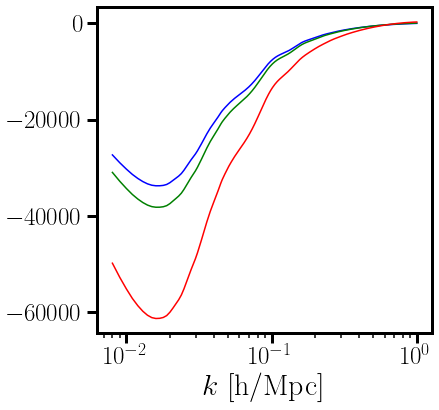

Omega_k_115.txt


<Figure size 432x288 with 0 Axes>

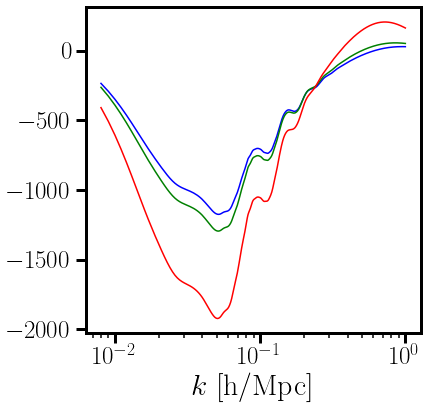

fEDE_4921_78.txt


<Figure size 432x288 with 0 Axes>

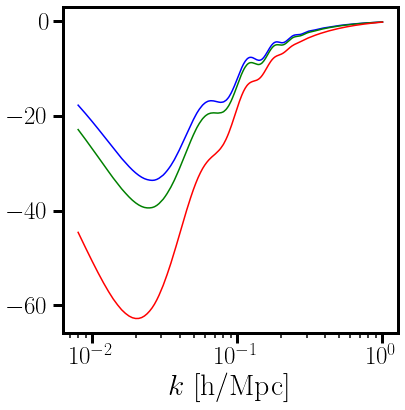

Da_115.txt


<Figure size 432x288 with 0 Axes>

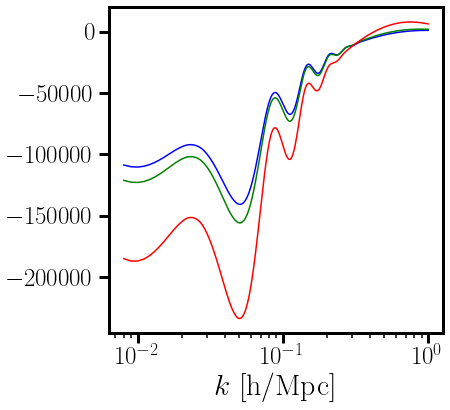

omega_b_78.txt


<Figure size 432x288 with 0 Axes>

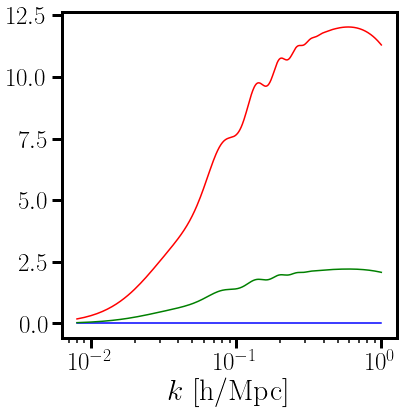

alpha2_115.txt


<Figure size 432x288 with 0 Axes>

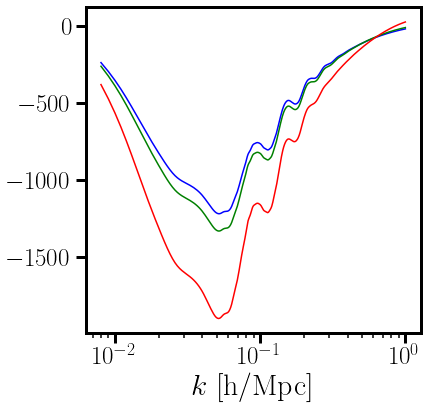

fEDE_4921_151.txt


<Figure size 432x288 with 0 Axes>

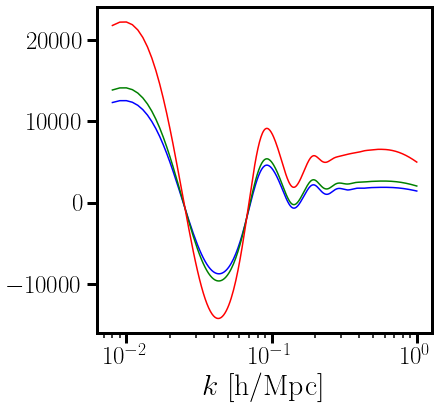

A_lin_6446_78.txt


<Figure size 432x288 with 0 Axes>

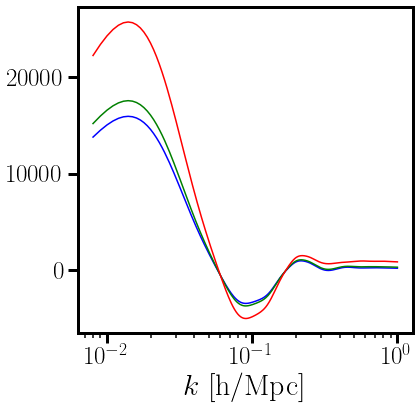

A_lin_2763_151.txt


<Figure size 432x288 with 0 Axes>

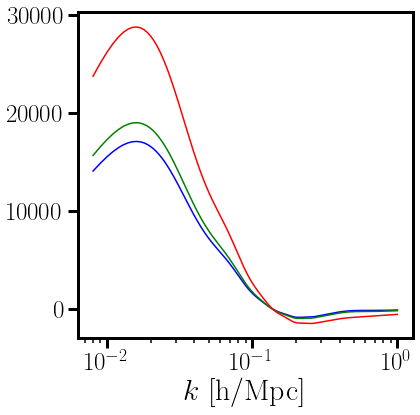

A_lin_1184_115.txt


<Figure size 432x288 with 0 Axes>

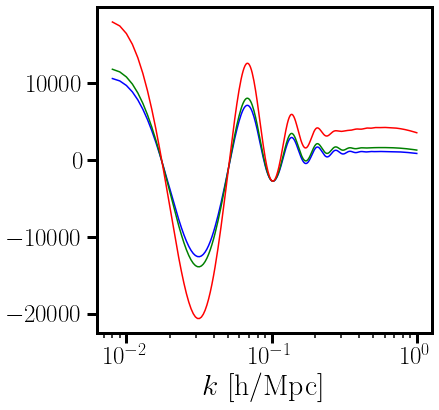

A_lin_9046_115.txt


<Figure size 432x288 with 0 Axes>

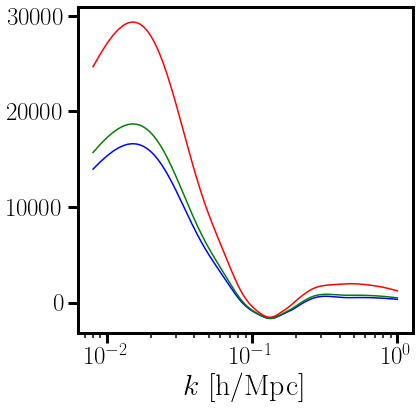

A_lin_1969_78.txt


<Figure size 432x288 with 0 Axes>

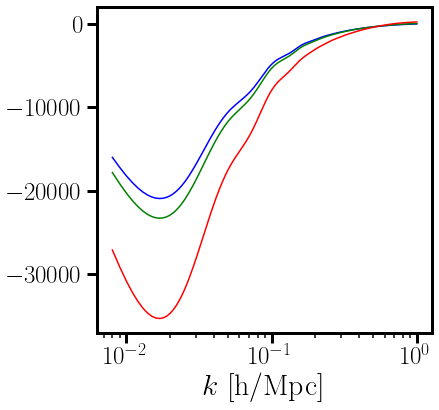

fEDE_1500_115.txt


<Figure size 432x288 with 0 Axes>

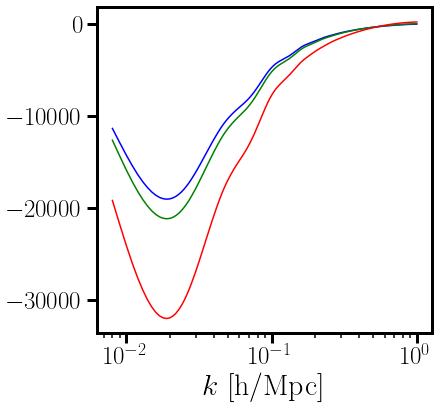

fEDE_2289_115.txt


<Figure size 432x288 with 0 Axes>

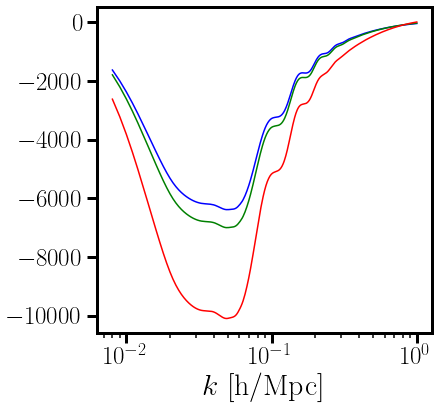

fEDE_3605_151.txt


<Figure size 432x288 with 0 Axes>

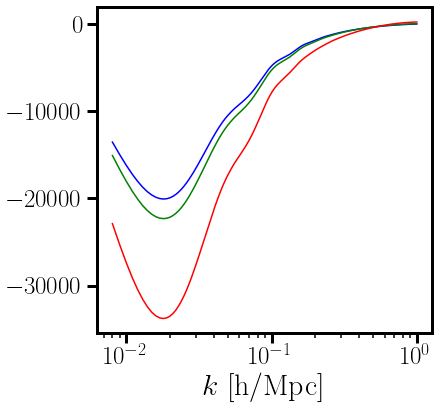

fEDE_2026_115.txt


<Figure size 432x288 with 0 Axes>

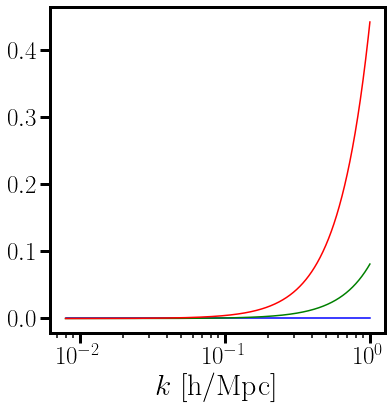

sn2_115.txt


<Figure size 432x288 with 0 Axes>

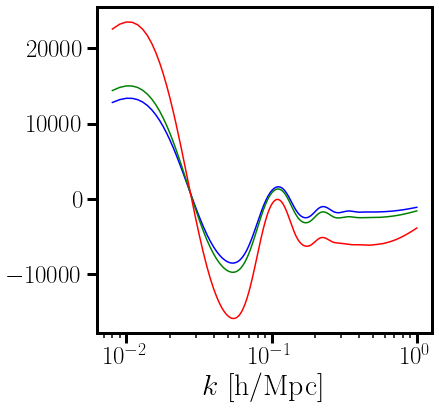

A_lin_5441_78.txt


<Figure size 432x288 with 0 Axes>

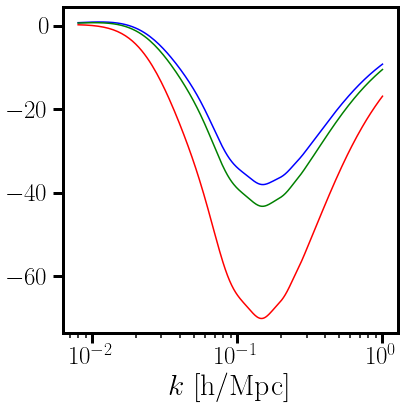

bs_151.txt


<Figure size 432x288 with 0 Axes>

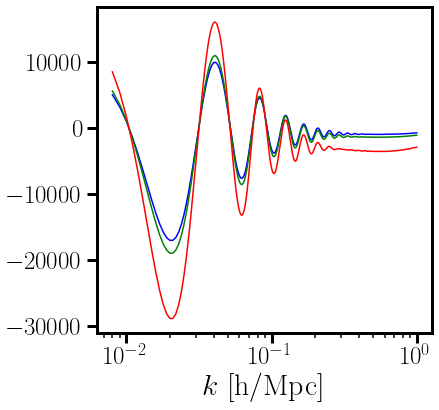

A_lin_15038_115.txt


<Figure size 432x288 with 0 Axes>

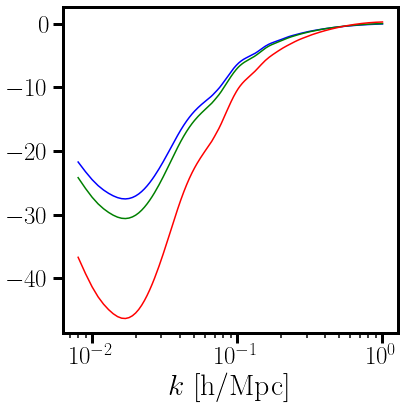

tau_reio_115.txt


<Figure size 432x288 with 0 Axes>

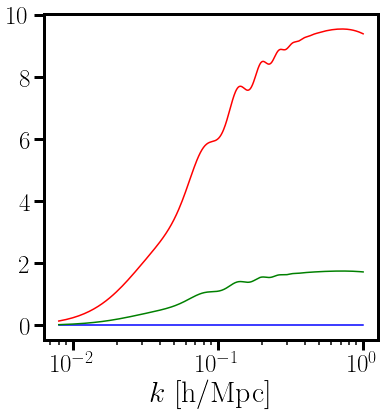

alpha2_151.txt


<Figure size 432x288 with 0 Axes>

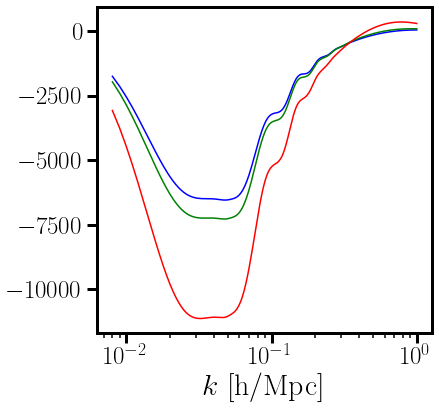

fEDE_3562_78.txt


<Figure size 432x288 with 0 Axes>

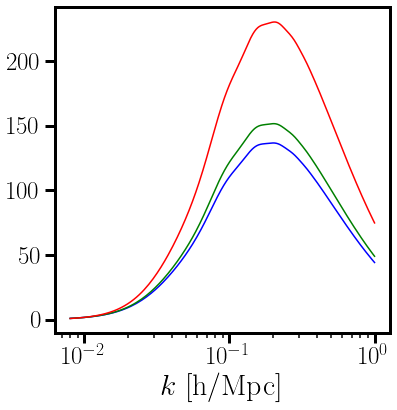

b2_151.txt


<Figure size 432x288 with 0 Axes>

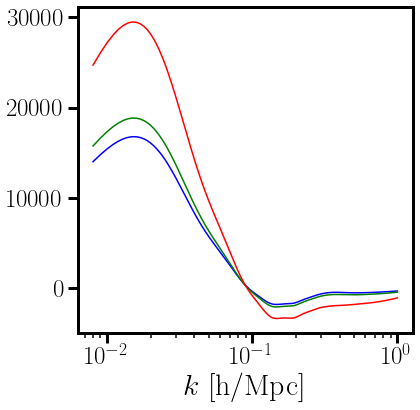

A_lin_1662_78.txt


<Figure size 432x288 with 0 Axes>

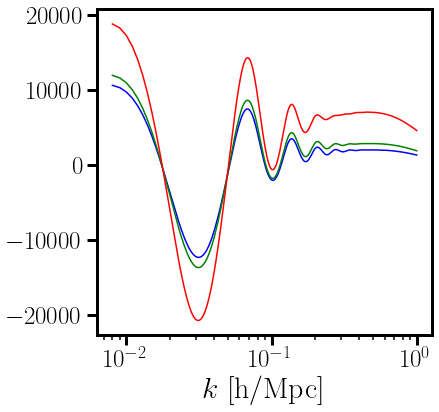

A_lin_9046_78.txt


<Figure size 432x288 with 0 Axes>

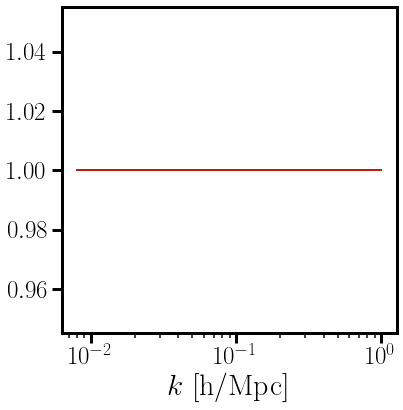

N_151.txt


<Figure size 432x288 with 0 Axes>

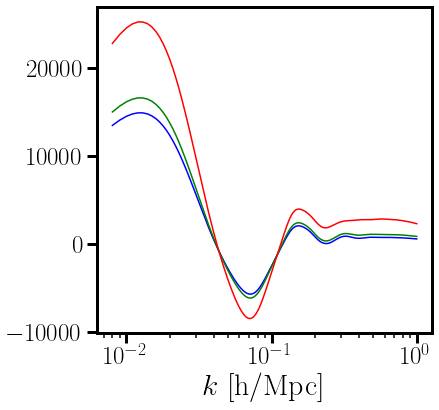

A_lin_3877_115.txt


<Figure size 432x288 with 0 Axes>

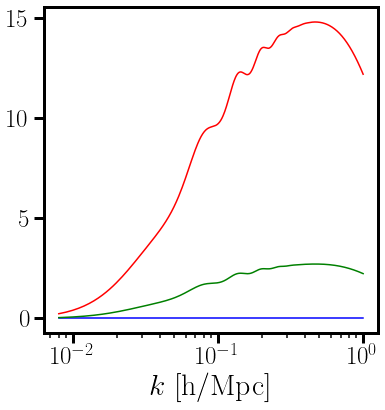

alpha2_78.txt


<Figure size 432x288 with 0 Axes>

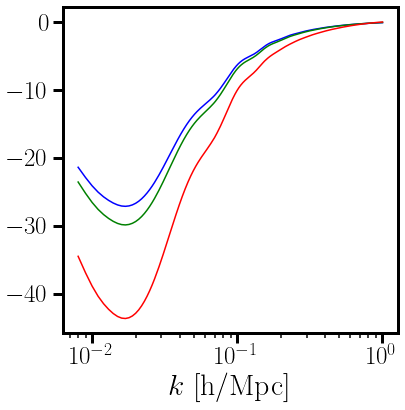

tau_reio_151.txt


<Figure size 432x288 with 0 Axes>

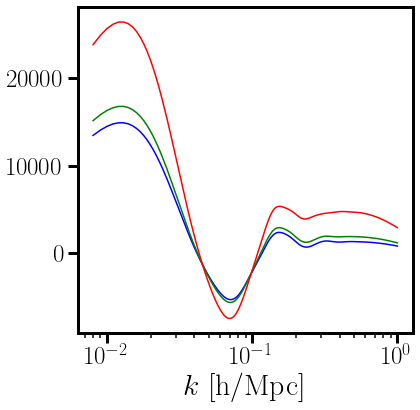

A_lin_3877_78.txt


<Figure size 432x288 with 0 Axes>

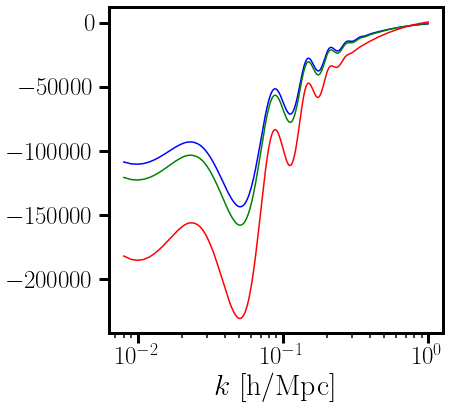

omega_b_151.txt


<Figure size 432x288 with 0 Axes>

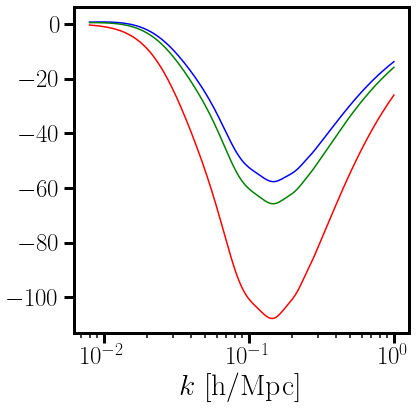

bs_115.txt


<Figure size 432x288 with 0 Axes>

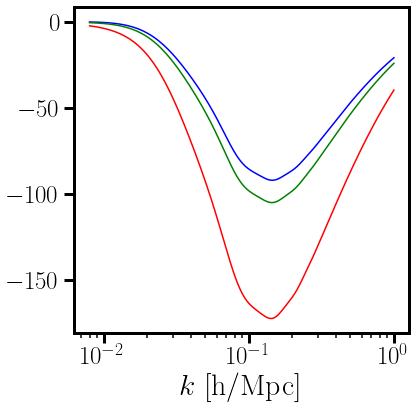

bs_78.txt


<Figure size 432x288 with 0 Axes>

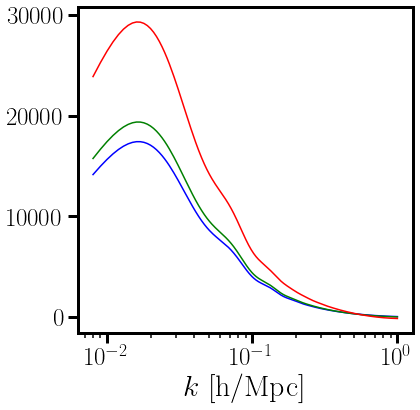

log(A_s)_115.txt


<Figure size 432x288 with 0 Axes>

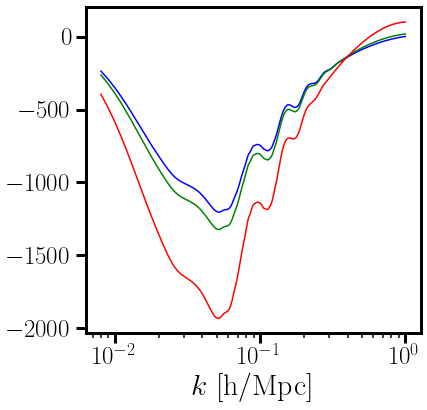

fEDE_4921_115.txt


<Figure size 432x288 with 0 Axes>

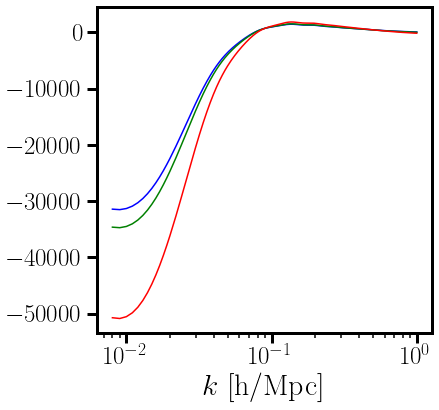

n_s_151.txt


<Figure size 432x288 with 0 Axes>

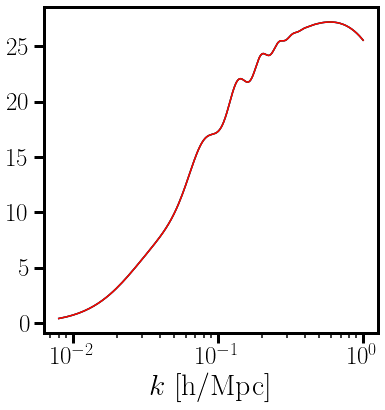

alpha0_115.txt


<Figure size 432x288 with 0 Axes>

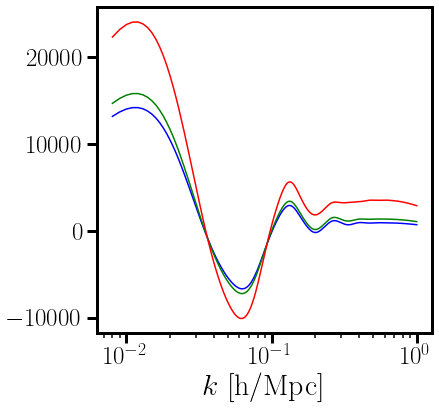

A_lin_4593_115.txt


<Figure size 432x288 with 0 Axes>

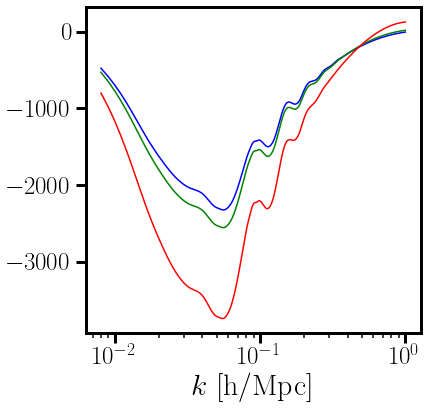

fEDE_4394_115.txt


<Figure size 432x288 with 0 Axes>

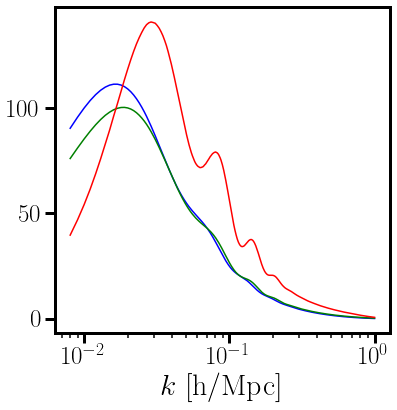

Hz_78.txt


<Figure size 432x288 with 0 Axes>

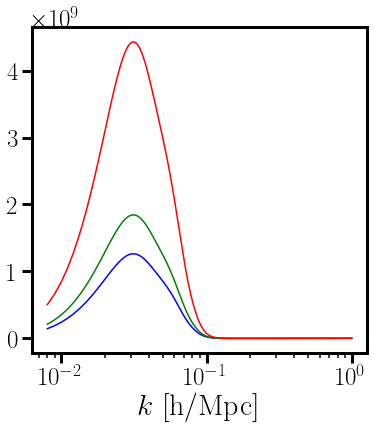

A_lin_21103_78.txt


<Figure size 432x288 with 0 Axes>

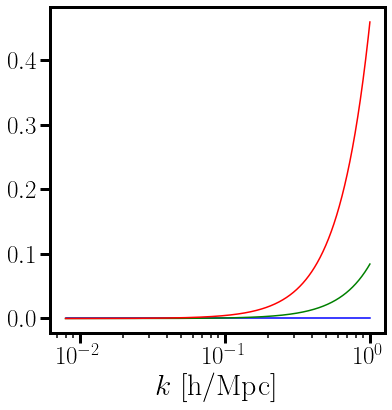

sn2_151.txt


<Figure size 432x288 with 0 Axes>

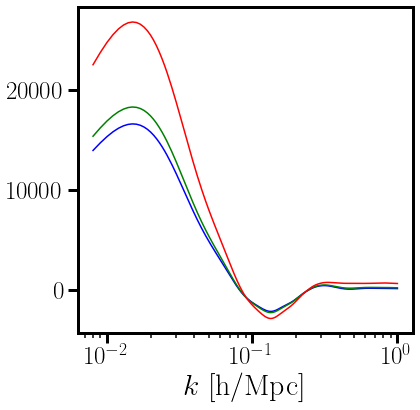

A_lin_1969_151.txt


<Figure size 432x288 with 0 Axes>

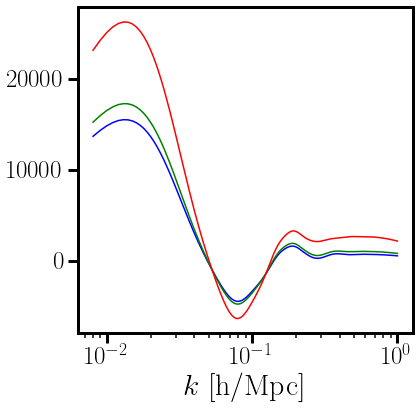

A_lin_3273_115.txt


<Figure size 432x288 with 0 Axes>

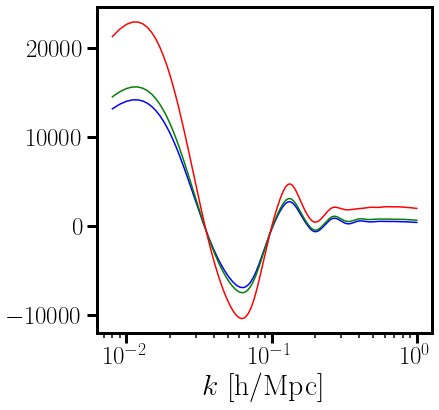

A_lin_4593_151.txt


<Figure size 432x288 with 0 Axes>

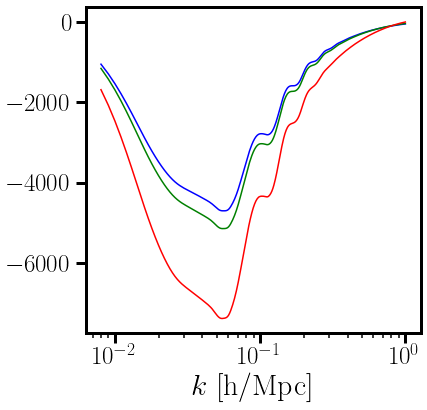

fEDE_3868_151.txt


<Figure size 432x288 with 0 Axes>

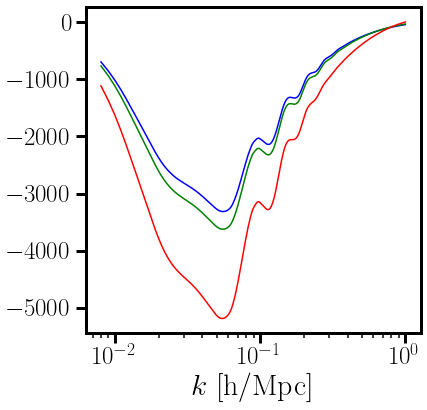

fEDE_4131_151.txt


<Figure size 432x288 with 0 Axes>

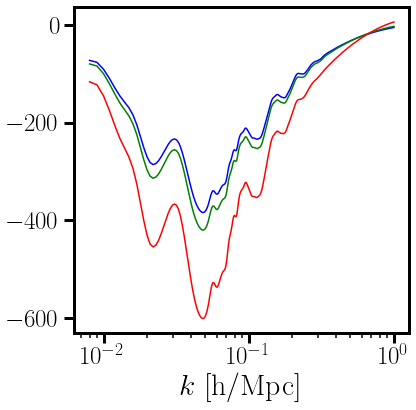

fEDE_5973_151.txt


<Figure size 432x288 with 0 Axes>

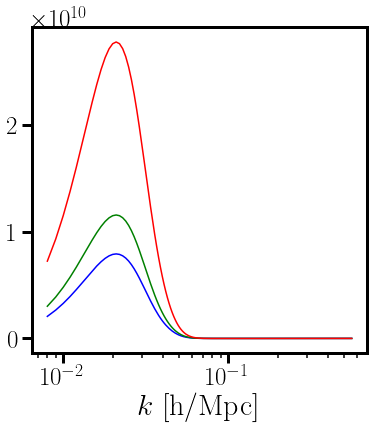

A_lin_24999_78.txt


<Figure size 432x288 with 0 Axes>

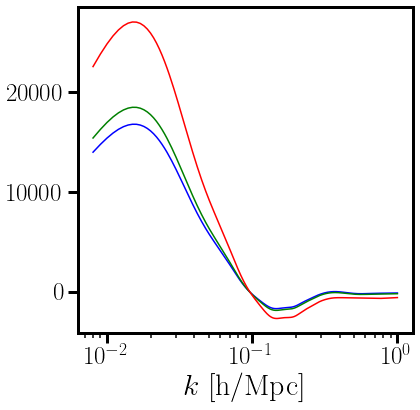

A_lin_1662_151.txt


<Figure size 432x288 with 0 Axes>

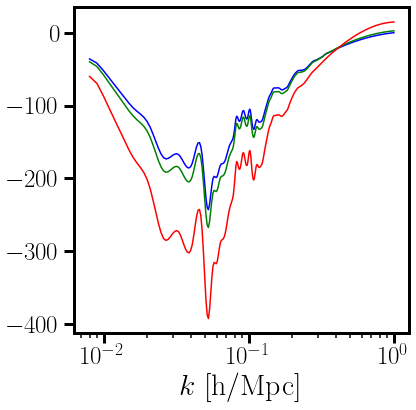

fEDE_6500_115.txt


<Figure size 432x288 with 0 Axes>

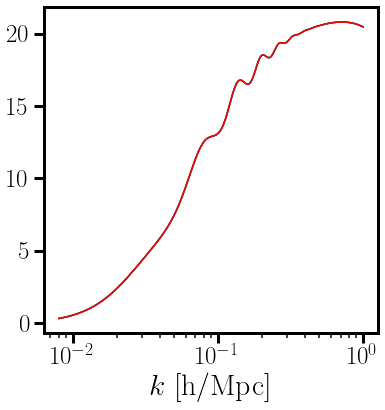

alpha0_151.txt


<Figure size 432x288 with 0 Axes>

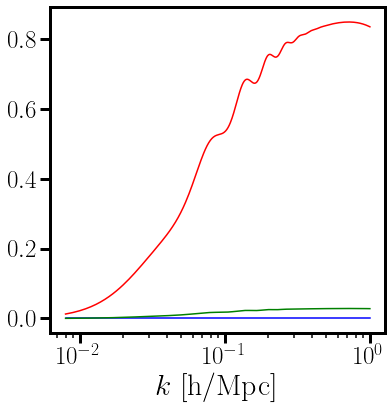

alpha4_151.txt


<Figure size 432x288 with 0 Axes>

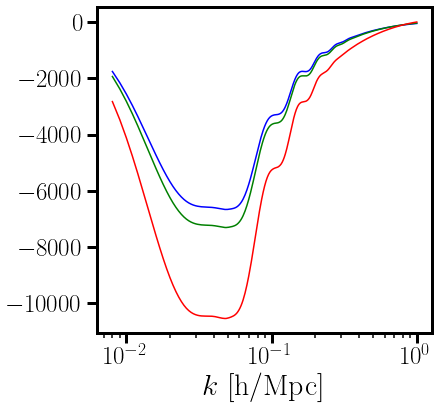

fEDE_3562_151.txt


<Figure size 432x288 with 0 Axes>

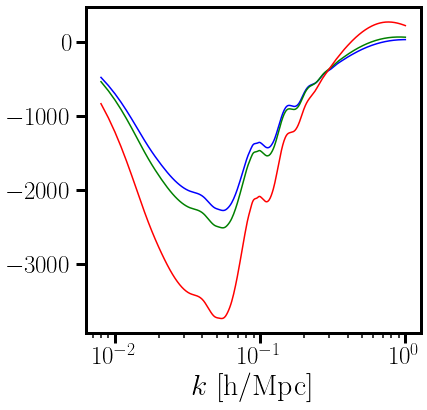

fEDE_4394_78.txt


<Figure size 432x288 with 0 Axes>

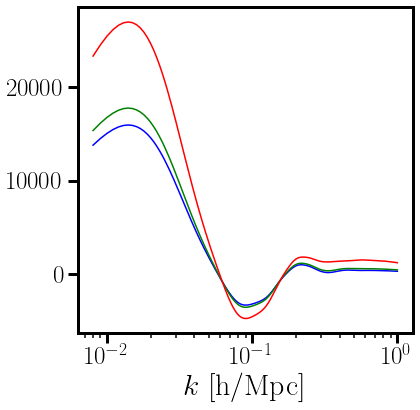

A_lin_2763_115.txt


<Figure size 432x288 with 0 Axes>

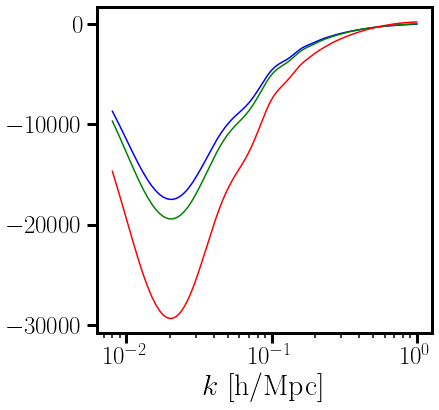

fEDE_2552_115.txt


<Figure size 432x288 with 0 Axes>

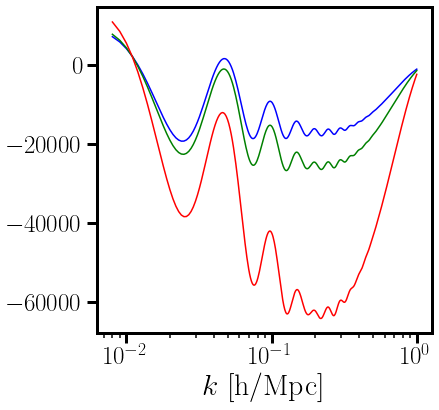

A_lin_12695_151.txt


<Figure size 432x288 with 0 Axes>

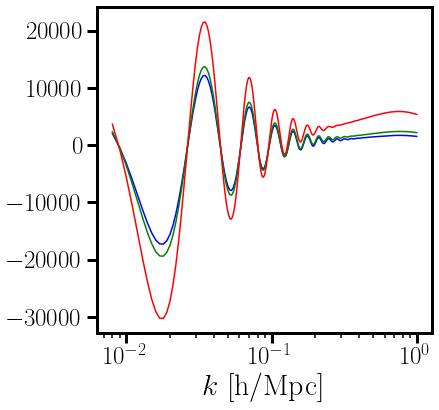

A_lin_17815_78.txt


<Figure size 432x288 with 0 Axes>

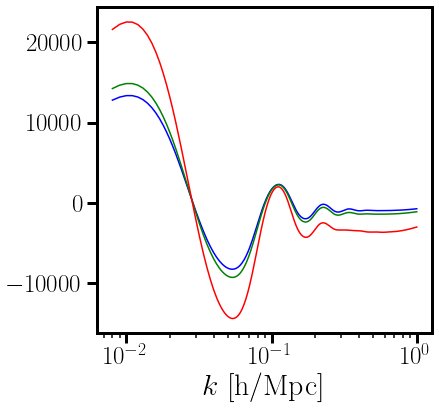

A_lin_5441_115.txt


<Figure size 432x288 with 0 Axes>

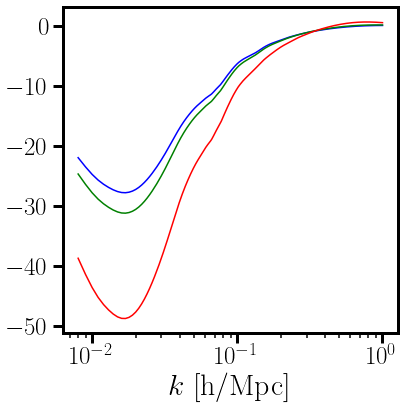

tau_reio_78.txt


<Figure size 432x288 with 0 Axes>

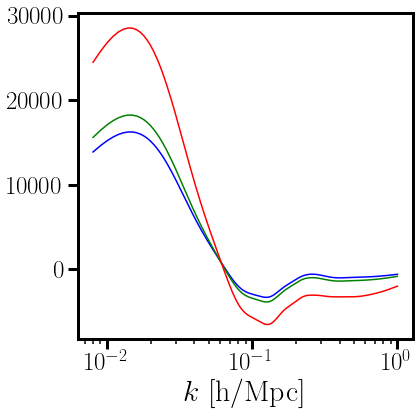

A_lin_2332_78.txt


<Figure size 432x288 with 0 Axes>

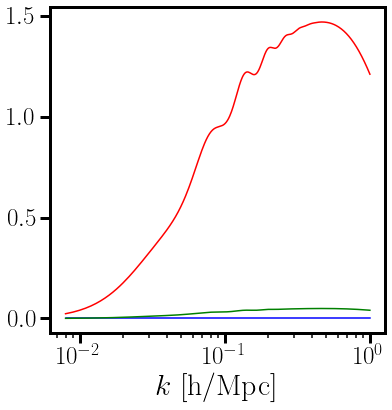

alpha4_78.txt


<Figure size 432x288 with 0 Axes>

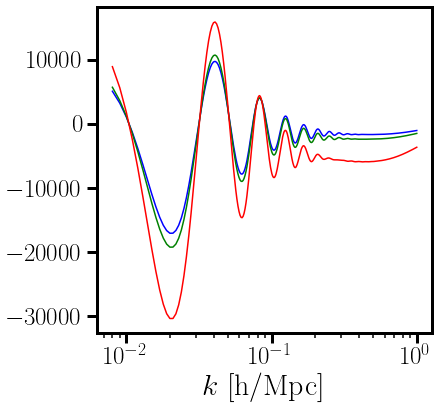

A_lin_15038_78.txt


<Figure size 432x288 with 0 Axes>

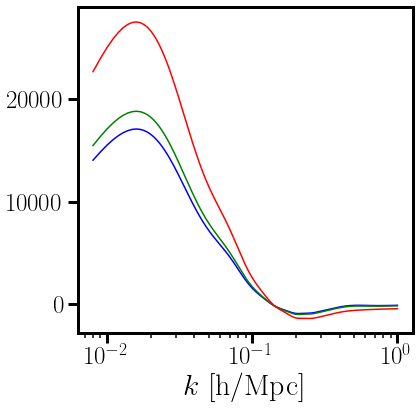

A_lin_1184_151.txt


<Figure size 432x288 with 0 Axes>

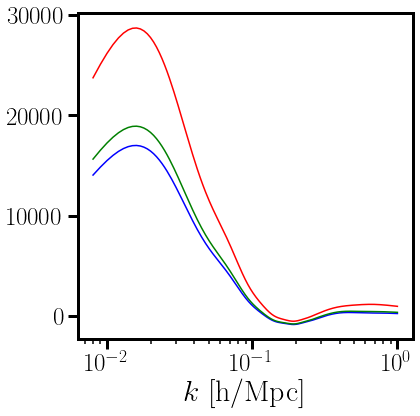

A_lin_1403_115.txt


<Figure size 432x288 with 0 Axes>

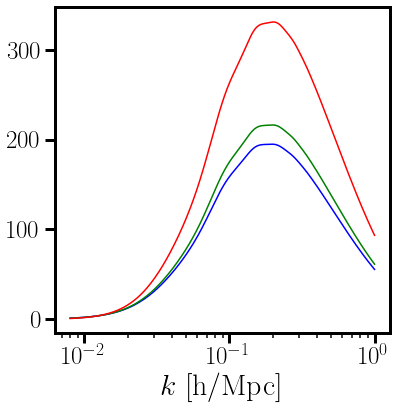

b2_115.txt


<Figure size 432x288 with 0 Axes>

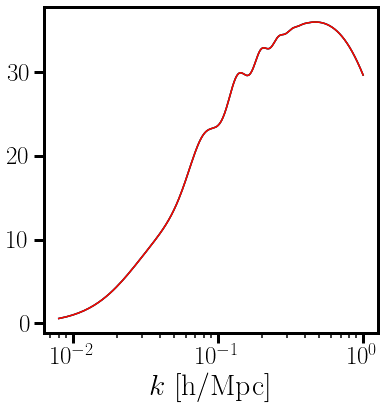

alpha0_78.txt


<Figure size 432x288 with 0 Axes>

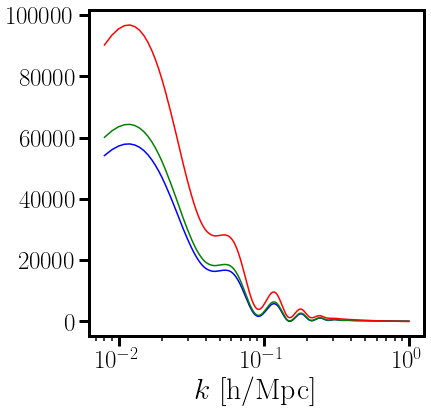

h_151.txt


<Figure size 432x288 with 0 Axes>

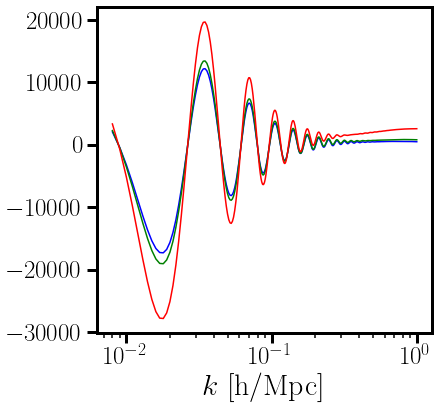

A_lin_17815_151.txt


<Figure size 432x288 with 0 Axes>

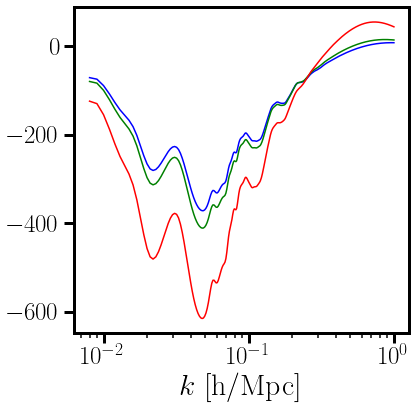

fEDE_5973_78.txt


<Figure size 432x288 with 0 Axes>

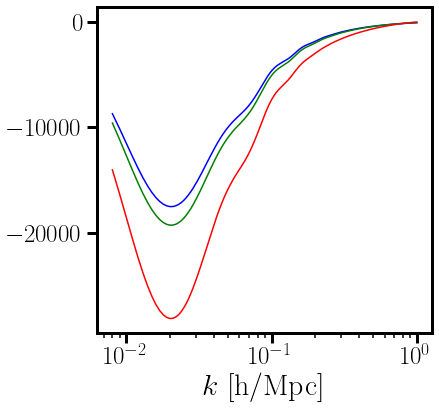

fEDE_2552_151.txt


<Figure size 432x288 with 0 Axes>

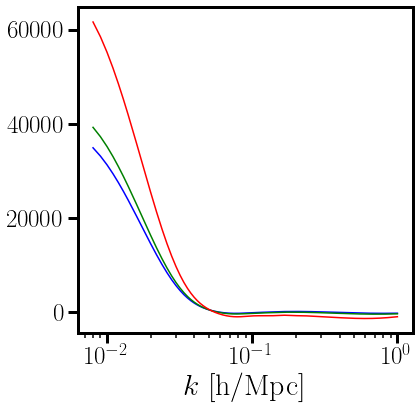

alpha_s_78.txt


<Figure size 432x288 with 0 Axes>

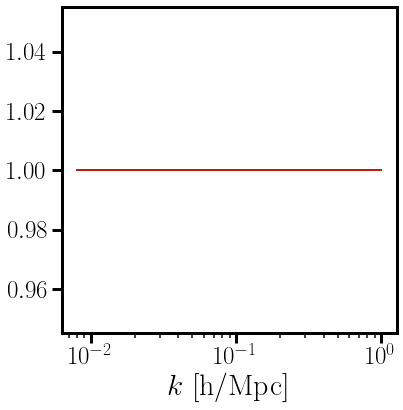

N_78.txt


<Figure size 432x288 with 0 Axes>

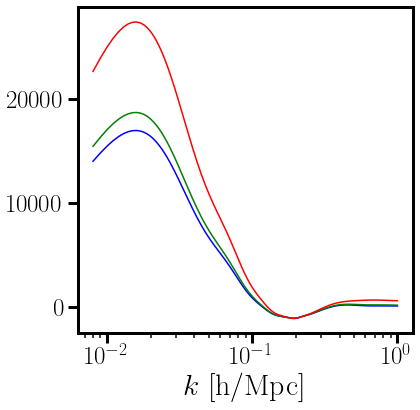

A_lin_1403_151.txt


<Figure size 432x288 with 0 Axes>

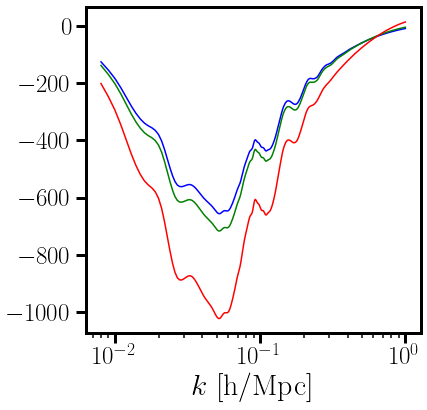

fEDE_5447_151.txt


<Figure size 432x288 with 0 Axes>

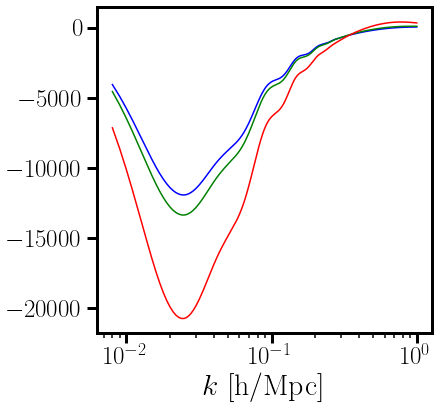

fEDE_3078_78.txt


<Figure size 432x288 with 0 Axes>

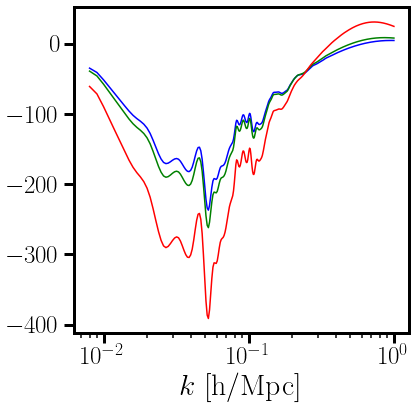

fEDE_6500_78.txt


<Figure size 432x288 with 0 Axes>

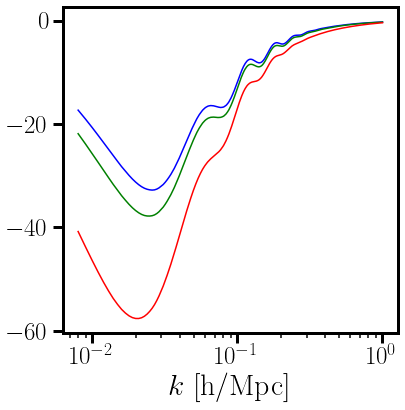

Da_151.txt


<Figure size 432x288 with 0 Axes>

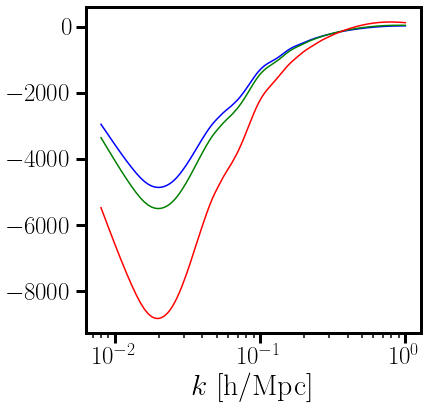

m_ncdm_78.txt


<Figure size 432x288 with 0 Axes>

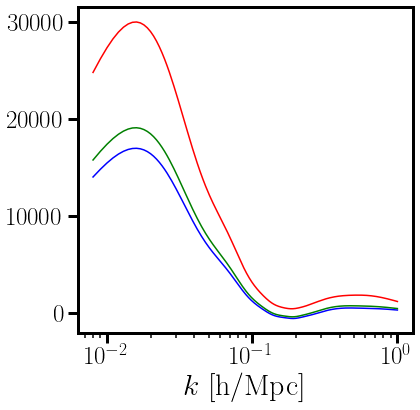

A_lin_1403_78.txt


<Figure size 432x288 with 0 Axes>

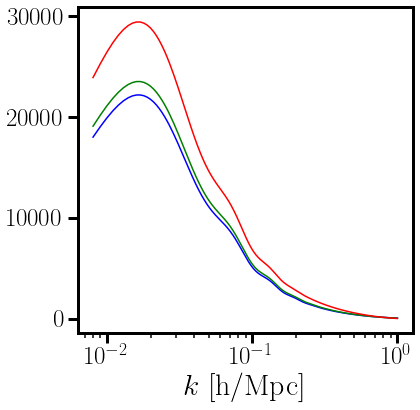

b_78.txt


<Figure size 432x288 with 0 Axes>

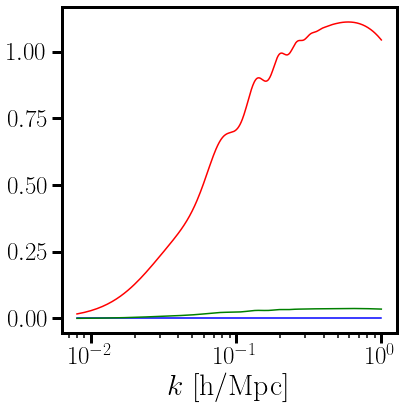

alpha4_115.txt


<Figure size 432x288 with 0 Axes>

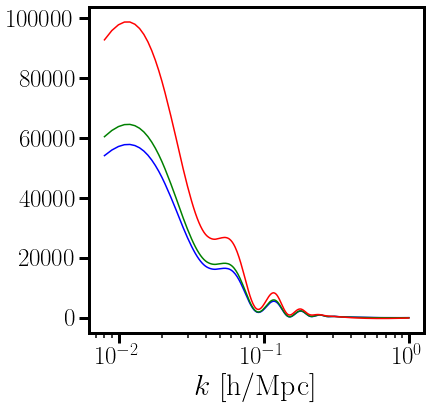

h_78.txt


<Figure size 432x288 with 0 Axes>

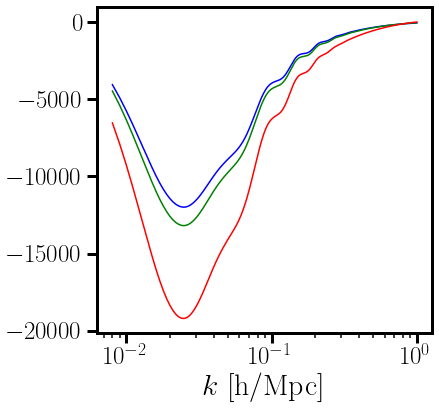

fEDE_3078_151.txt


<Figure size 432x288 with 0 Axes>

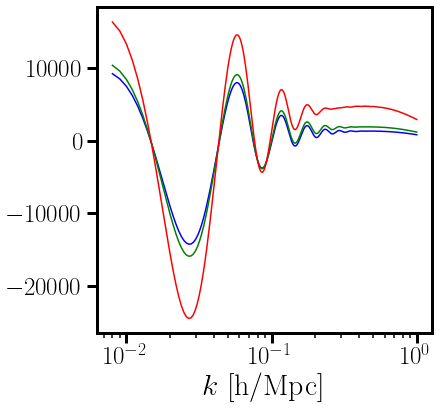

A_lin_10716_78.txt


<Figure size 432x288 with 0 Axes>

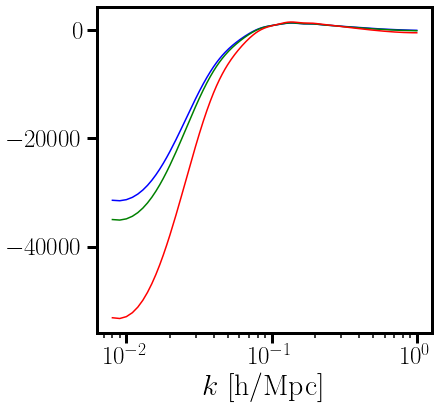

n_s_115.txt


<Figure size 432x288 with 0 Axes>

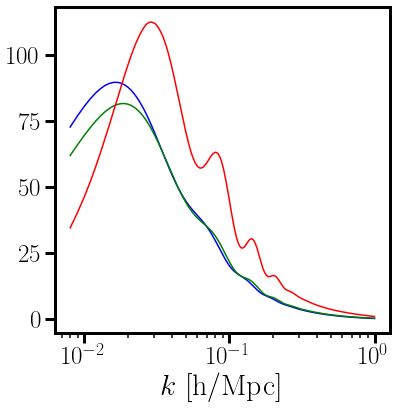

Hz_115.txt


<Figure size 432x288 with 0 Axes>

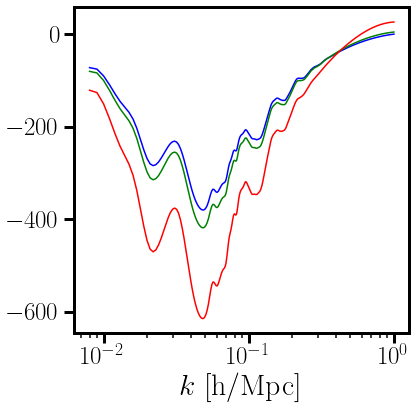

fEDE_5973_115.txt


<Figure size 432x288 with 0 Axes>

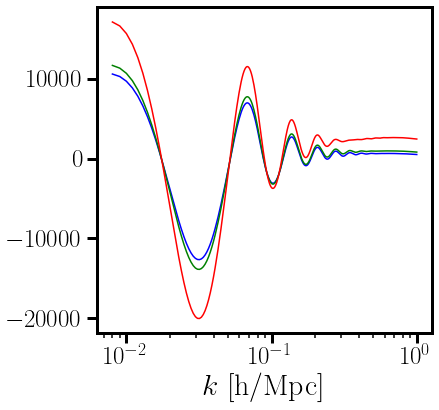

A_lin_9046_151.txt


<Figure size 432x288 with 0 Axes>

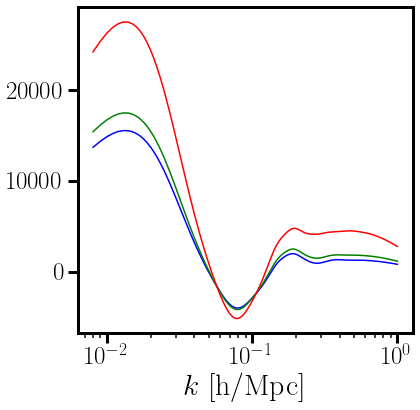

A_lin_3273_78.txt


<Figure size 432x288 with 0 Axes>

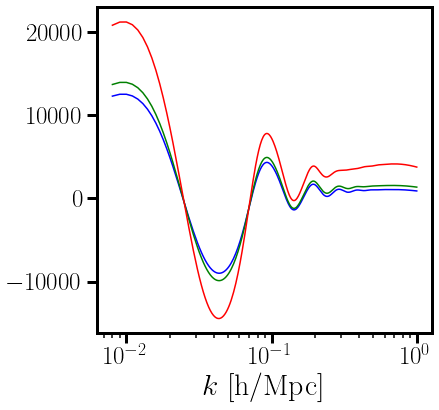

A_lin_6446_115.txt


<Figure size 432x288 with 0 Axes>

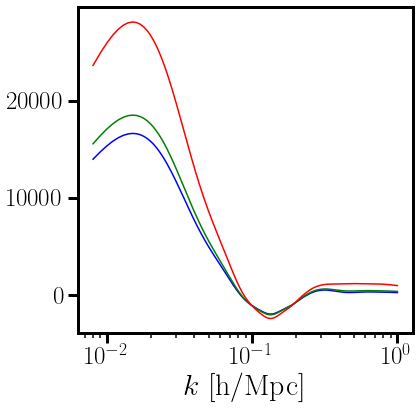

A_lin_1969_115.txt


<Figure size 432x288 with 0 Axes>

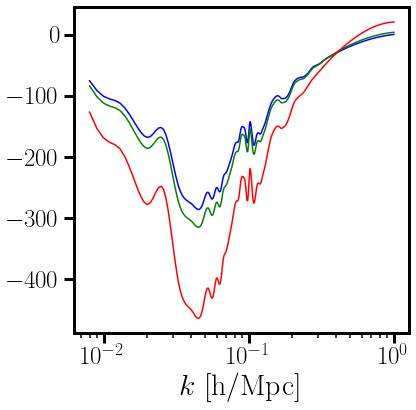

fEDE_6236_115.txt


<Figure size 432x288 with 0 Axes>

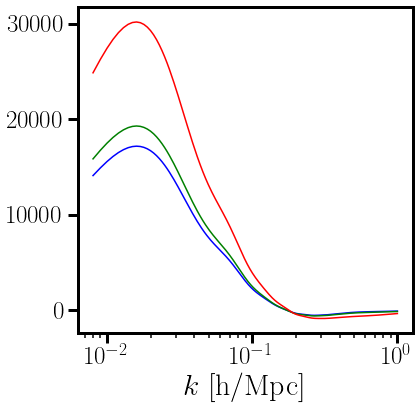

A_lin_1000_78.txt


<Figure size 432x288 with 0 Axes>

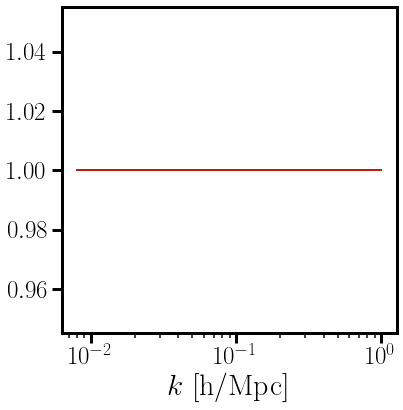

N_115.txt


<Figure size 432x288 with 0 Axes>

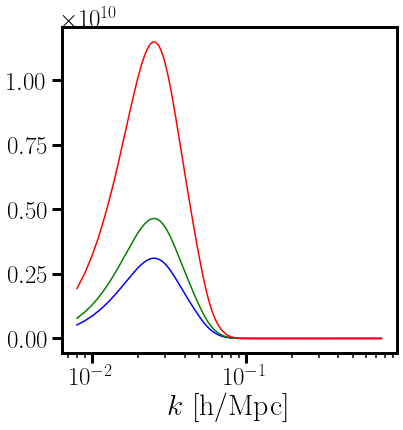

A_lin_24999_151.txt


<Figure size 432x288 with 0 Axes>

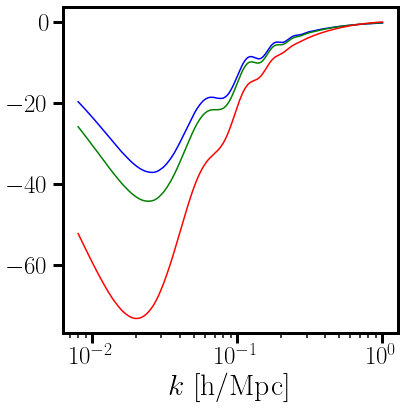

Da_78.txt


<Figure size 432x288 with 0 Axes>

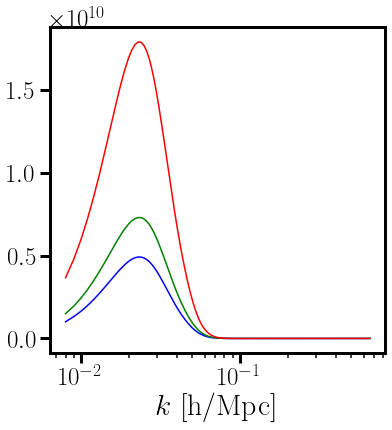

A_lin_24999_115.txt


<Figure size 432x288 with 0 Axes>

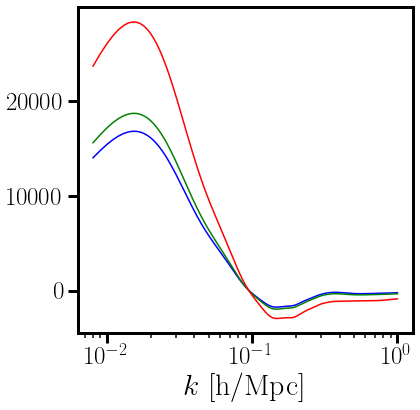

A_lin_1662_115.txt


<Figure size 432x288 with 0 Axes>

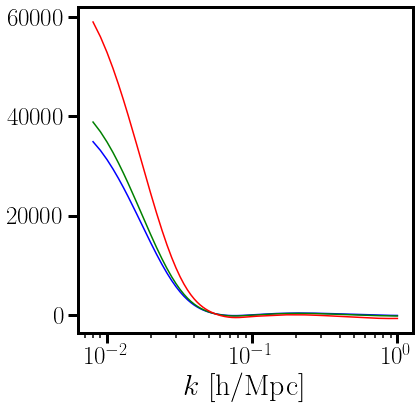

alpha_s_115.txt


<Figure size 432x288 with 0 Axes>

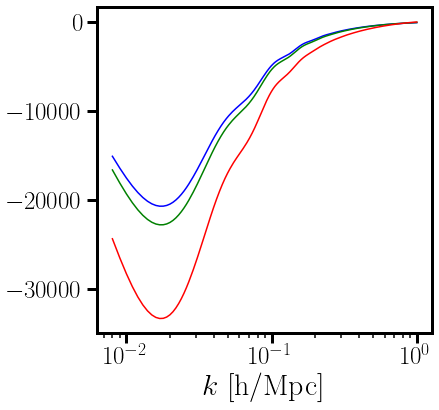

fEDE_1763_151.txt


<Figure size 432x288 with 0 Axes>

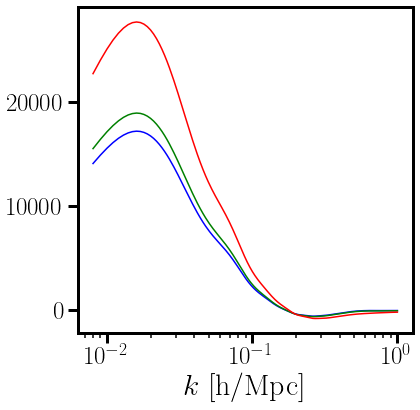

A_lin_1000_151.txt


<Figure size 432x288 with 0 Axes>

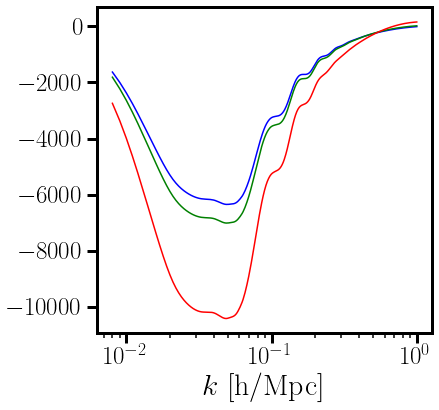

fEDE_3605_115.txt


<Figure size 432x288 with 0 Axes>

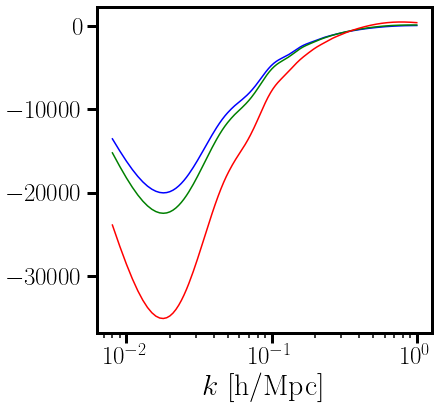

fEDE_2026_78.txt


<Figure size 432x288 with 0 Axes>

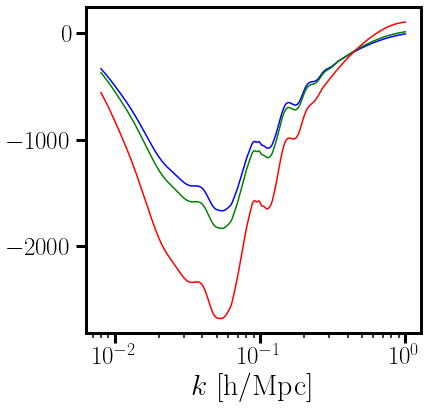

fEDE_4657_115.txt


<Figure size 432x288 with 0 Axes>

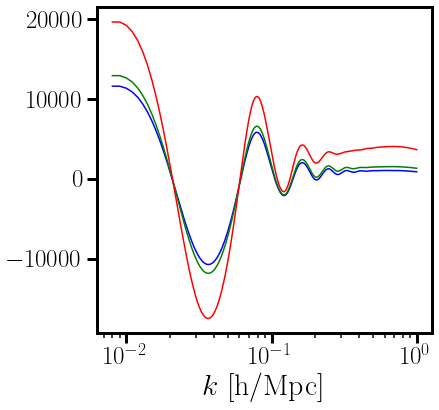

A_lin_7636_115.txt


<Figure size 432x288 with 0 Axes>

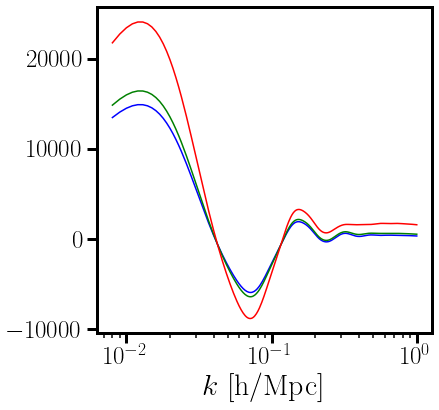

A_lin_3877_151.txt


<Figure size 432x288 with 0 Axes>

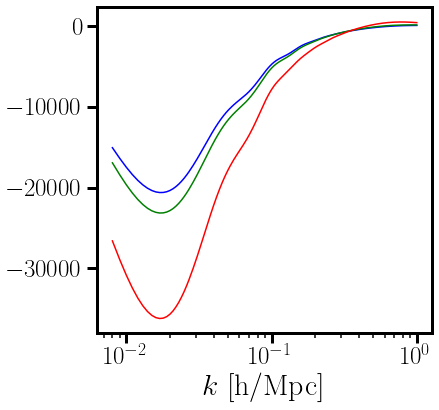

fEDE_1763_78.txt


<Figure size 432x288 with 0 Axes>

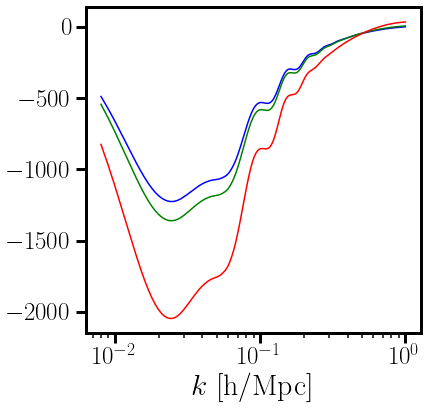

N_ur_115.txt


<Figure size 432x288 with 0 Axes>

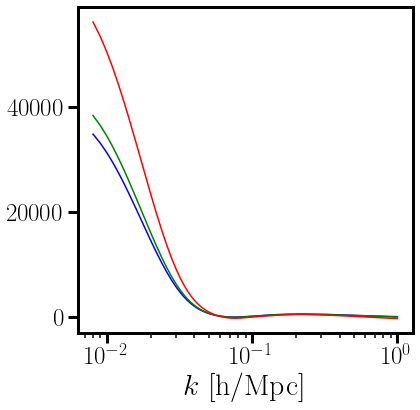

alpha_s_151.txt


<Figure size 432x288 with 0 Axes>

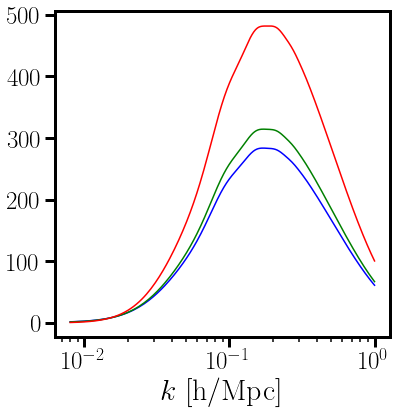

b2_78.txt


<Figure size 432x288 with 0 Axes>

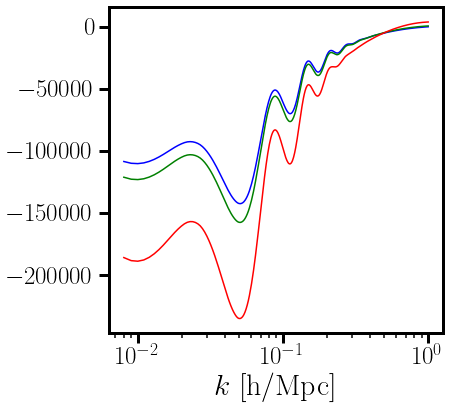

omega_b_115.txt


<Figure size 432x288 with 0 Axes>

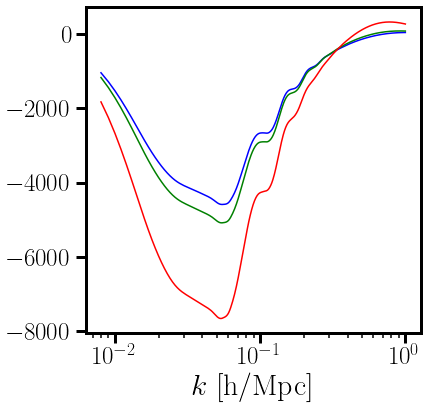

fEDE_3868_78.txt


<Figure size 432x288 with 0 Axes>

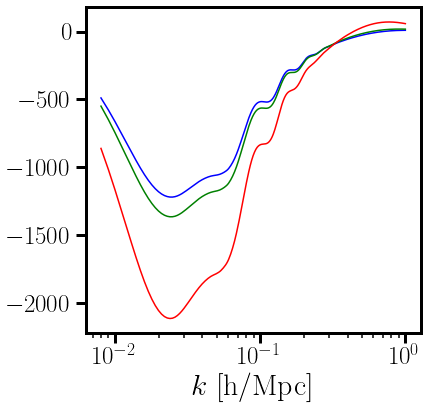

N_ur_78.txt


<Figure size 432x288 with 0 Axes>

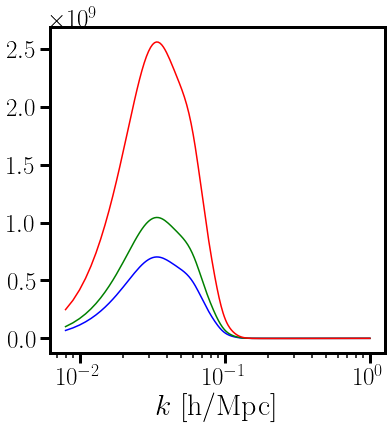

A_lin_21103_115.txt


<Figure size 432x288 with 0 Axes>

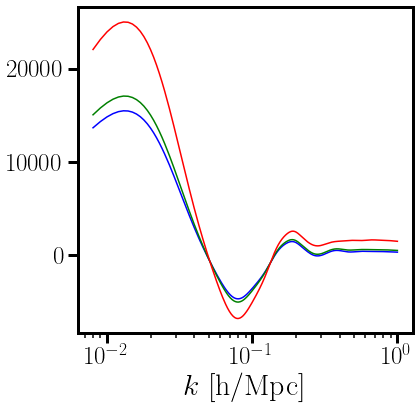

A_lin_3273_151.txt


<Figure size 432x288 with 0 Axes>

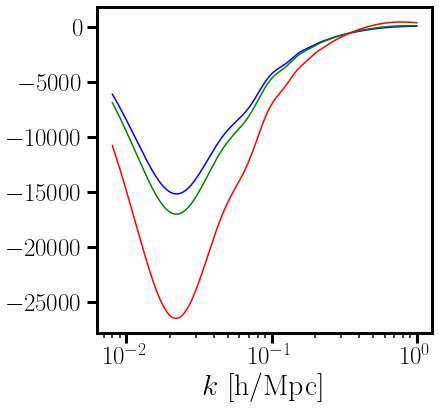

fEDE_2815_78.txt


<Figure size 432x288 with 0 Axes>

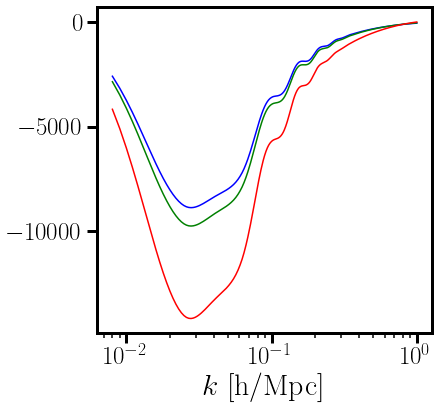

fEDE_3342_151.txt


<Figure size 432x288 with 0 Axes>

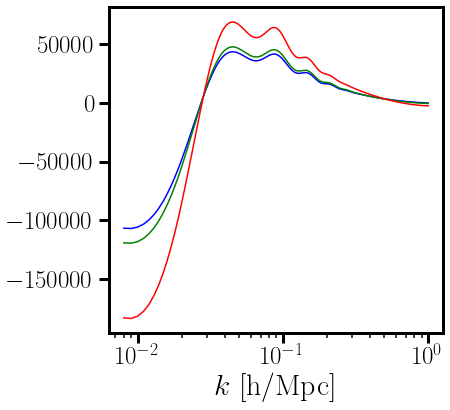

omega_cdm_115.txt


<Figure size 432x288 with 0 Axes>

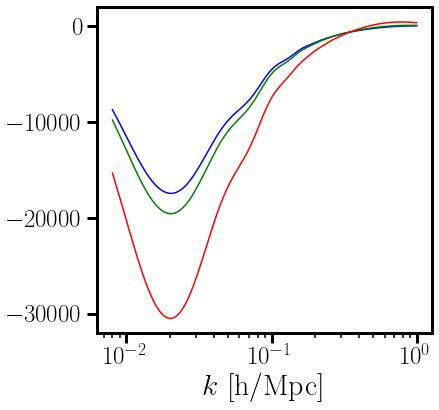

fEDE_2552_78.txt


<Figure size 432x288 with 0 Axes>

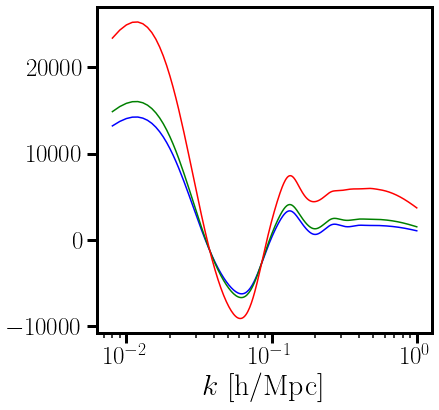

A_lin_4593_78.txt


<Figure size 432x288 with 0 Axes>

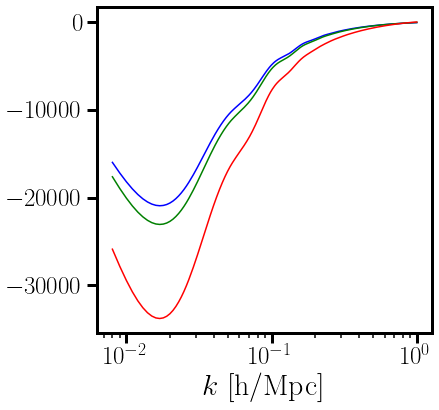

fEDE_1500_151.txt


<Figure size 432x288 with 0 Axes>

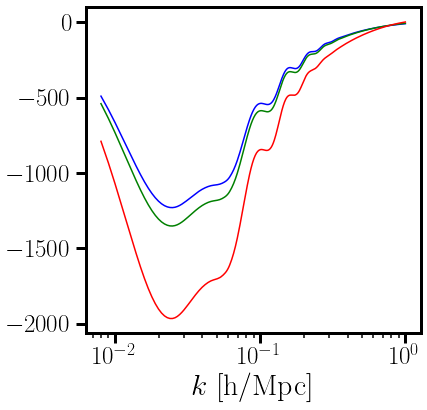

N_ur_151.txt


<Figure size 432x288 with 0 Axes>

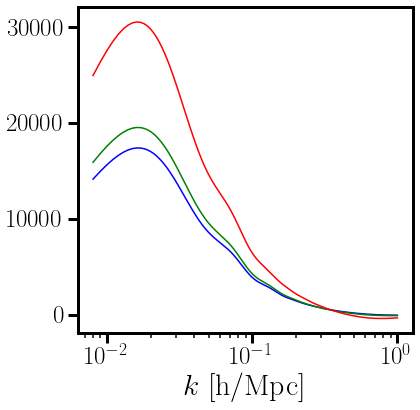

log(A_s)_78.txt


<Figure size 432x288 with 0 Axes>

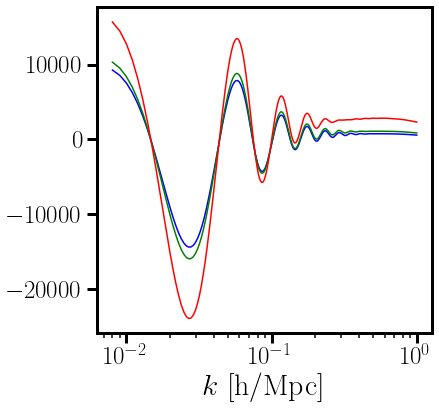

A_lin_10716_115.txt


<Figure size 432x288 with 0 Axes>

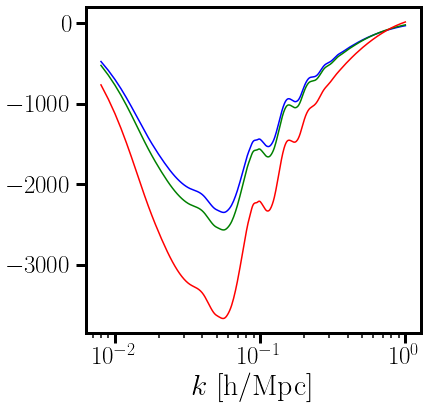

fEDE_4394_151.txt


<Figure size 432x288 with 0 Axes>

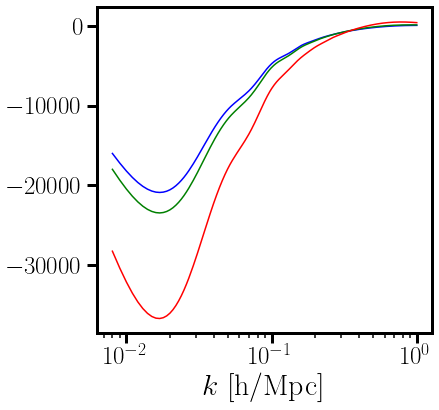

fEDE_1500_78.txt


<Figure size 432x288 with 0 Axes>

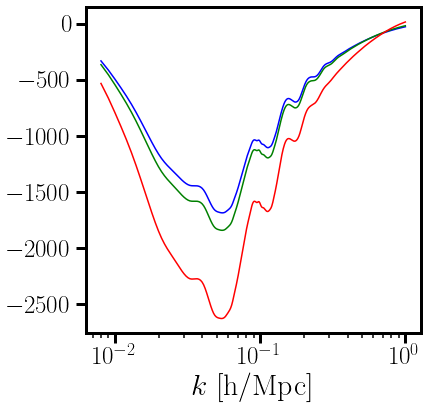

fEDE_4657_151.txt


<Figure size 432x288 with 0 Axes>

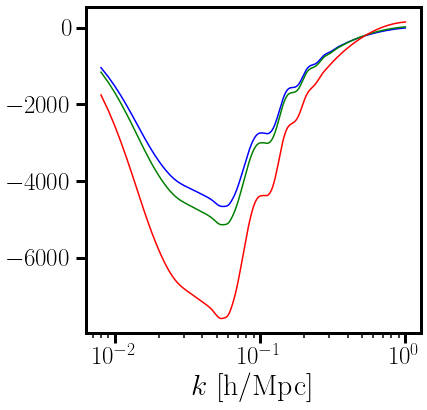

fEDE_3868_115.txt


<Figure size 432x288 with 0 Axes>

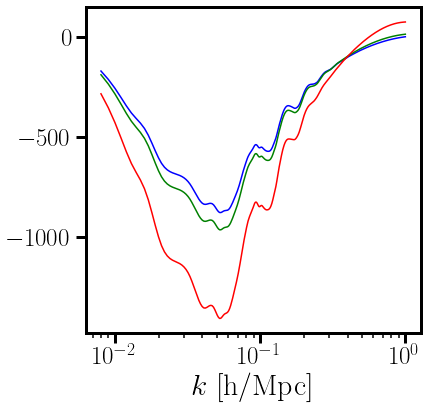

fEDE_5184_115.txt


<Figure size 432x288 with 0 Axes>

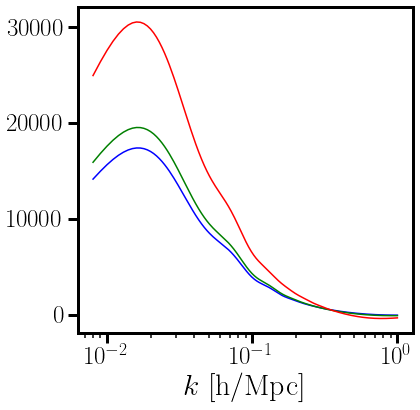

A_lin_1_78.txt


<Figure size 432x288 with 0 Axes>

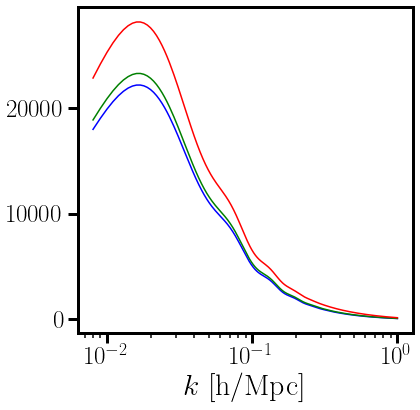

b_151.txt


<Figure size 432x288 with 0 Axes>

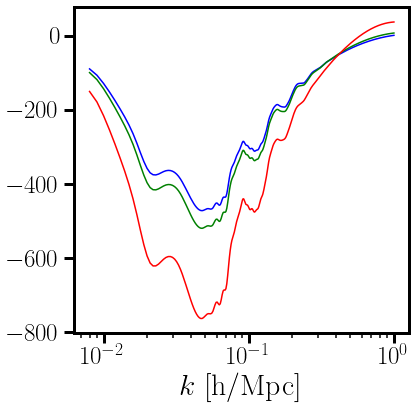

fEDE_5710_115.txt


<Figure size 432x288 with 0 Axes>

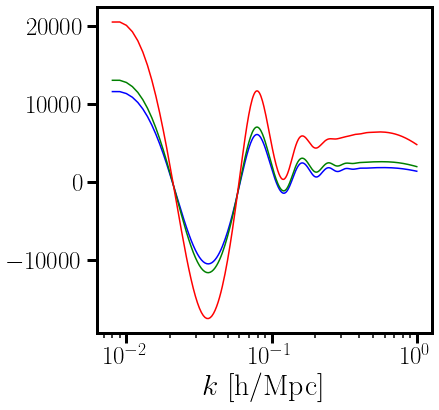

A_lin_7636_78.txt


<Figure size 432x288 with 0 Axes>

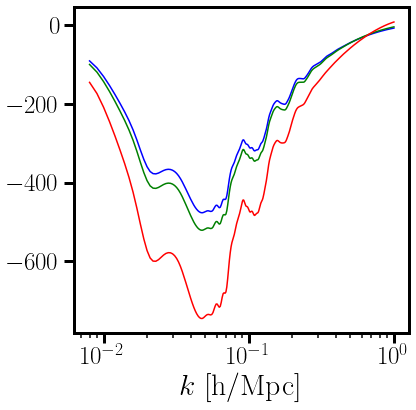

fEDE_5710_151.txt


<Figure size 432x288 with 0 Axes>

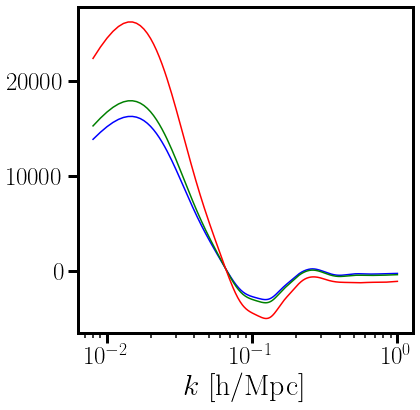

A_lin_2332_151.txt


<Figure size 432x288 with 0 Axes>

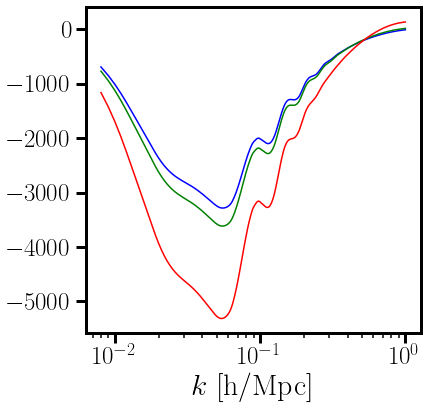

fEDE_4131_115.txt


<Figure size 432x288 with 0 Axes>

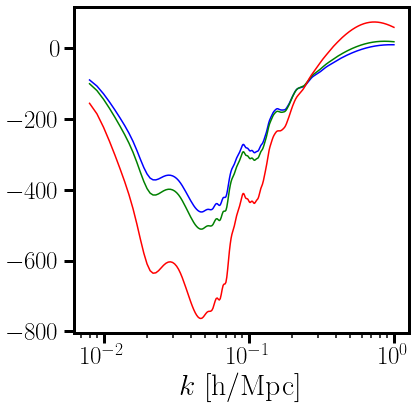

fEDE_5710_78.txt


<Figure size 432x288 with 0 Axes>

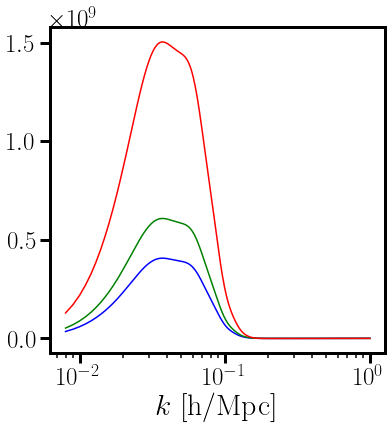

A_lin_21103_151.txt


<Figure size 432x288 with 0 Axes>

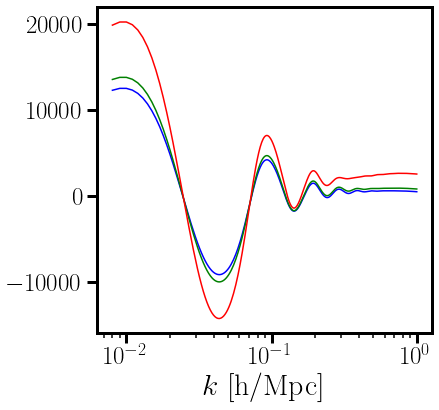

A_lin_6446_151.txt


<Figure size 432x288 with 0 Axes>

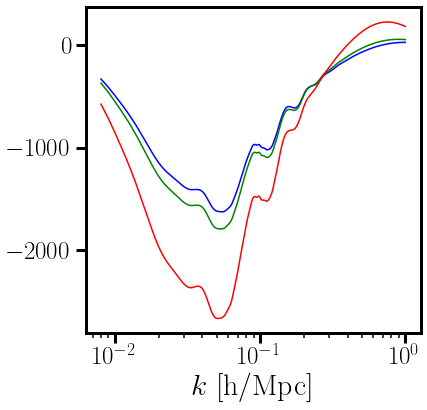

fEDE_4657_78.txt


<Figure size 432x288 with 0 Axes>

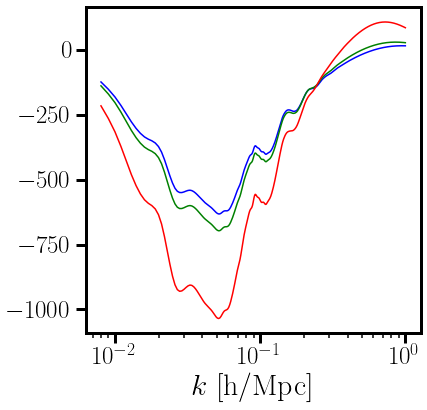

fEDE_5447_78.txt


<Figure size 432x288 with 0 Axes>

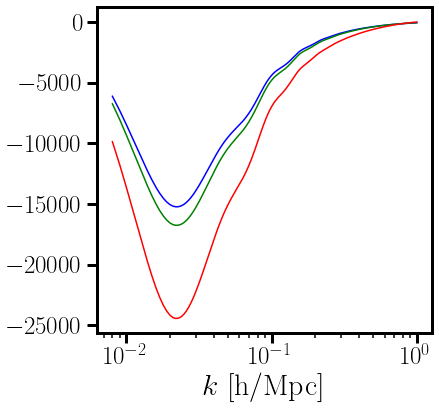

fEDE_2815_151.txt


<Figure size 432x288 with 0 Axes>

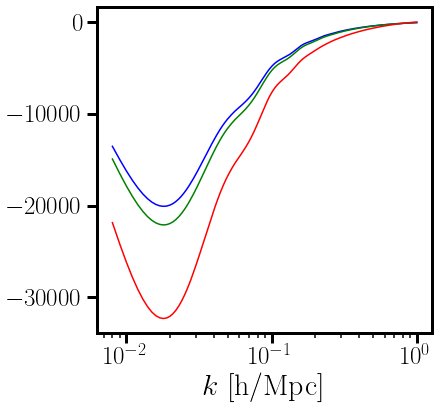

fEDE_2026_151.txt


<Figure size 432x288 with 0 Axes>

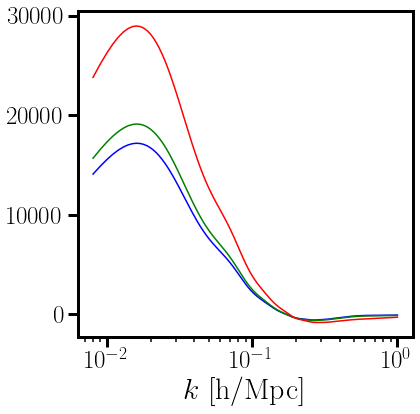

A_lin_1000_115.txt


<Figure size 432x288 with 0 Axes>

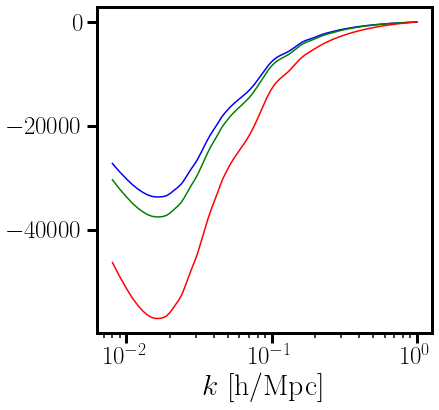

Omega_k_151.txt


<Figure size 432x288 with 0 Axes>

In [9]:
desiCast.check_derivatives()

## Loading SO priors

In [7]:
SO = np.zeros((15,15))

# in H_0, tau_reio, omega_nu, omega_b, omega_cdm, A_s, n_s basis
tmp = np.genfromtxt('input/LAT_baseline_fsky04_fish_mat.dat')
# in h, tau_reio, omega_nu, omega_b, omega_cdm, log(A_s), n_s basis
tmp[0,:] *= 100.
tmp[:,0] *= 100.
tmp[5,:] *= desiParams['A_s']
tmp[:,5] *= desiParams['A_s']

mapping = {0:0,1:5,2:4,3:6,4:3,5:1}
for i in range(6):
    for j in range(6):
        SO[i,j] = tmp[mapping[i],mapping[j]]

## Calculating marginalized parameters

### Need to be careful here about $k_\text{max}$. Sould it be a hard cuttoff or $k_\text{max} = \alpha k_\text{nl}$

In [8]:
def marginalized_error(param):
   basis = np.array(['h','log(A_s)','omega_cdm','n_s','omega_b','tau_reio','b','b2','bs',\
                  'alpha0','alpha2','alpha4','sn2','N',param])
   F = desiCast.gen_fisher(basis)
   return np.sqrt(np.linalg.inv(F)[-1,-1]),np.sqrt(np.linalg.inv(F+SO)[-1,-1])

In [9]:
marginalized_error('N_ur')

(1.0962490390433812, 0.06145846166130345)

In [10]:
marginalized_error('m_ncdm')

(0.4193584438250658, 0.037880385363800576)

In [11]:
marginalized_error('alpha_s')

(0.01392124139951541, 0.009878917546075993)

In [12]:
marginalized_error('Omega_k')

(0.06743865381464956, 0.005969226011139686)

In [5]:
zs = np.linspace(2.,5.8,100)
nfid= np.array([LBGn(desiCast, z) for z in zs])

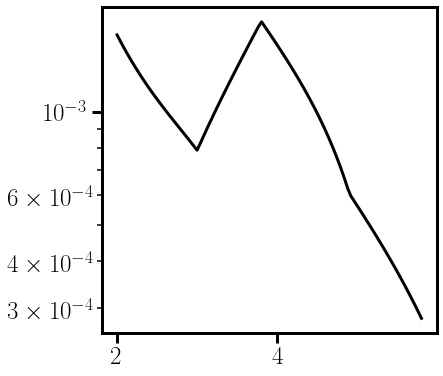

In [6]:
plt.figure(figsize=(6,6))

plt.semilogy(zs,nfid,color='k',lw=3)

NameError: name 'gen_fisher' is not defined